In [1]:
#Importing Libraries 
import pandas as pd #Pandas
import numpy as np #numpy
import seaborn as sns #for Visualization
import matplotlib.pyplot as plt #Visualization
from sklearn.linear_model import LogisticRegression #Model
from sklearn.model_selection import train_test_split #model
from sklearn import metrics 
import math


In [2]:
df16=pd.read_excel(r"C:\Users\Tarushee\OneDrive\Documents\My Data Sources\Desktop\Main Datasets\ML Dataset\HR Analytics\staff utlz latest 16-17_masked.xlsx")
df16.head(1) #Reading sheet1 and then analzing top 1 rows from the problem statement Dataset

,Employee No,New_id,Profit Center,Employee Name,Employee Position,Employ_posi,Employee Location,Location,People Group,Employee Category,...,Unnamed: 14,Final_date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
0,1092,1092_17,PC - 3,Aaron Mcneil,Level 7,7,Location 1,1,Client Service Staff,Staff on Probation,...,2017-12-31,2017-12-31 00:00:00,120,32.0,32.0,8.0,80.0,0.0,0.0,1


In [3]:
df17=pd.read_excel(r"C:\Users\Tarushee\OneDrive\Documents\My Data Sources\Desktop\Main Datasets\ML Dataset\HR Analytics\staff utlz latest 17-18_masked.xlsx")
df17.head(1)
#Reading second sheet of the problem statement Dataset and analyzing 1st Row

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2000-09-30,Active,NaT,2080,1864.5,448.0,188,27.5,1431.5,18.0,0.240279


In [4]:
term=pd.read_excel(r"C:\Users\Tarushee\OneDrive\Documents\My Data Sources\Desktop\Main Datasets\ML Dataset\HR Analytics\Terminations 15-18.xlsx")
term.head(1)
#Reading Third sheet of the problem statement Dataset and analyzing 1st Row

,Employee Number,Employee Name,YEAR of Birth,Gender,Leaving Reason,Previous Employer,Last Update Date,Latest Available Rating,Emp Ref.
0,4,Barbee Joey,1975,M,Career Growth,kadoo,2018-02-27,NaN,NaN


In [5]:
df16.info()
#check sheet1 Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Employee No            1762 non-null   int64         
 1   New_id                 1762 non-null   object        
 2   Profit Center          1762 non-null   object        
 3   Employee Name          1762 non-null   object        
 4   Employee Position      1762 non-null   object        
 5   Employ_posi            1762 non-null   object        
 6   Employee Location      1762 non-null   object        
 7   Location               1762 non-null   int64         
 8   People Group           1762 non-null   object        
 9   Employee Category      1762 non-null   object        
 10  Supervisor name        1762 non-null   object        
 11  Join Date              1762 non-null   datetime64[ns]
 12  Current Status         1762 non-null   object        
 13  Ter

In [6]:
df16.columns #checking columns of 1st sheet of the problem satement Dataset

Index(['Employee No', 'New_id', 'Profit Center', 'Employee Name',
       'Employee Position', 'Employ_posi', 'Employee Location', 'Location',
       'People Group', 'Employee Category', 'Supervisor name', 'Join Date',
       'Current Status', 'Termination Date', 'Unnamed: 14', 'Final_date',
       'Total Hours', 'Total Available Hours', 'Work Hours', 'Leave Hours',
       'Training Hours', 'BD Hours', 'NC Hours', 'Utilization%'],
      dtype='object')

In [7]:
df17.columns #checking columns of 2nd sheet of the problem satement Dataset

Index(['Employee No', 'Profit Center', 'Employee Name', 'Employee Position',
       'Employee Location', 'People Group', 'Employee Category',
       'Supervisor name', 'Join Date', 'Current Status', 'Termination Date',
       'Total Hours', 'Total Available Hours', 'Work Hours', 'Leave Hours',
       'Training Hours', 'BD Hours', 'NC Hours', 'Utilization%'],
      dtype='object')

In [8]:
df16.drop(columns=["New_id","Employ_posi","Location","Unnamed: 14","Final_date"],inplace=True)
#Dropping columns of 1st sheet of the problem satement Dataset and trying to have same number of columns from sheet 1 and sheet 2


In [9]:
df16.shape 
#checking shape of sheet1 after dropping columns, there are 1762 rows and 19 columns 

(1762, 19)

In [10]:
df16.info() #checking DataTypes and names of the columns after dropping it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Employee No            1762 non-null   int64         
 1   Profit Center          1762 non-null   object        
 2   Employee Name          1762 non-null   object        
 3   Employee Position      1762 non-null   object        
 4   Employee Location      1762 non-null   object        
 5   People Group           1762 non-null   object        
 6   Employee Category      1762 non-null   object        
 7   Supervisor name        1762 non-null   object        
 8   Join Date              1762 non-null   datetime64[ns]
 9   Current Status         1762 non-null   object        
 10  Termination Date       912 non-null    object        
 11  Total Hours            1762 non-null   int64         
 12  Total Available Hours  1762 non-null   float64       
 13  Wor

In [11]:
df17.info() #matching the columns in sheet2 from problem statemnet Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Employee No            973 non-null    int64         
 1   Profit Center          973 non-null    object        
 2   Employee Name          973 non-null    object        
 3   Employee Position      973 non-null    object        
 4   Employee Location      973 non-null    object        
 5   People Group           973 non-null    object        
 6   Employee Category      973 non-null    object        
 7   Supervisor name        973 non-null    object        
 8   Join Date              973 non-null    datetime64[ns]
 9   Current Status         973 non-null    object        
 10  Termination Date       145 non-null    datetime64[ns]
 11  Total Hours            973 non-null    int64         
 12  Total Available Hours  973 non-null    float64       
 13  Work 

In [12]:
#df17.drop(columns=["New_id","Employ_posi","Location","Unnamed: 14","Final_date"],inplace=True)

In [13]:
df17.shape #checking shape of sheet2 there are 973 rows and 19 columns

(973, 19)

In [14]:
df16.shape #checking shape of sheet1 there are 1762 rows and 19 columns

(1762, 19)

In [15]:
df16["Termination Date"]=df16["Termination Date"].replace("-", np.NaN)  
#Replacing ( - ) vaules from termination Date columns of 1st sheet with NAN

In [16]:

df17["Termination Date"]=df17["Termination Date"].replace("-", np.NaN)
#Replacing ( - ) vaules from termination Date columns of 2nd sheet with NAN

In [17]:
df17["Termination Date"]=df17["Termination Date"].replace(" ", np.NaN)
##Replacing blank vaules from termination Date columns of 2nd sheet with NAN

## Deal with Error -- Duplicates

In [18]:
df16.duplicated(subset="Employee No").sum()  
#checking the number of duplicates from sheet 1 of column name Employee no, it shows there are errors in the Dataset

651

In [19]:
df17.duplicated(subset="Employee No").sum()
#checking the number of duplicates from sheet 2 of column name Employee no, it shows there are NO errors in the Dataset

0

In [20]:
df17.isnull().sum() 
#checking Null Values from the sheet 2 of the problem statemnet and shows there are Null values (828)in Termination Dates

Employee No                0
Profit Center              0
Employee Name              0
Employee Position          0
Employee Location          0
People Group               0
Employee Category          0
Supervisor name            0
Join Date                  0
Current Status             0
Termination Date         828
Total Hours                0
Total Available Hours      0
Work Hours                 0
Leave Hours                0
Training Hours             0
BD Hours                   0
NC Hours                   0
Utilization%               0
dtype: int64

In [21]:
df17["Termination Date"]=df17["Termination Date"].replace(" ", np.NaN)
#Replacing blank values with Nan od sheet 2

In [22]:
df17.isnull().sum()

Employee No                0
Profit Center              0
Employee Name              0
Employee Position          0
Employee Location          0
People Group               0
Employee Category          0
Supervisor name            0
Join Date                  0
Current Status             0
Termination Date         828
Total Hours                0
Total Available Hours      0
Work Hours                 0
Leave Hours                0
Training Hours             0
BD Hours                   0
NC Hours                   0
Utilization%               0
dtype: int64

In [23]:
df17["Termination Date"].value_counts(dropna=False)
#checking valuecounts from sheet 2 to get better insights of the Null values of the sheet 2 
#there are 828 NaT values that we need to correct.

NaT           828
2017-09-30     21
2017-12-31     17
2017-11-30     13
2018-02-28     12
2017-06-30     12
2017-10-31      9
2018-01-31      9
2017-05-31      9
2017-07-31      9
2018-04-30      8
2017-04-30      7
2017-08-31      7
2018-05-31      6
2018-03-31      5
2016-05-31      1
Name: Termination Date, dtype: int64

In [24]:
numm16=df16.select_dtypes(exclude=['object','datetime64[ns]'])
#To deal with Errors in sheet 1 from employee no we have created numerical column seperatly which exclude Datatype object and DateTime.

In [25]:
numm16.head()
#now we check new column named numm16 top 5 Rows 

,Employee No,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
0,1092,120,32.0,32.0,8.0,80.0,0.0,0.0
1,490,2088,1784.0,1072.0,304.0,0.0,0.0,920.0
2,490,2080,1832.0,1254.0,248.0,0.0,0.0,612.0
3,655,1680,1527.0,0.0,120.0,33.0,0.0,1528.0
4,655,2080,1952.0,1728.5,128.0,0.0,0.0,248.0


In [26]:
numm16.info()
#check the dataTypes of column named numm16

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee No            1762 non-null   int64  
 1   Total Hours            1762 non-null   int64  
 2   Total Available Hours  1762 non-null   float64
 3   Work Hours             1762 non-null   float64
 4   Leave Hours            1762 non-null   float64
 5   Training Hours         1762 non-null   float64
 6   BD Hours               1762 non-null   float64
 7   NC Hours               1762 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 110.3 KB


In [27]:
num16=pd.pivot_table(numm16,index="Employee No", values=["Total Hours","Total Available Hours","Work Hours","Leave Hours","Training Hours","BD Hours","NC Hours"], aggfunc="sum", sort=False)
#creating a pivot Table based on Employee No to treat error from employeeNO

In [28]:
num16 
#checking our Pivot Table

,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
Employee No,,,,,,,
1092,120,32.0,32.0,8.0,80.0,0.0,0.0
490,4168,3616.0,2326.0,552.0,0.0,0.0,1532.0
655,3760,3479.0,1728.5,248.0,33.0,0.0,1776.0
1085,160,131.0,72.0,8.0,21.0,0.0,59.0
610,3960,3575.5,2714.0,312.0,72.5,0.0,890.5
...,...,...,...,...,...,...,...
515,4168,3627.0,3340.0,504.0,37.0,0.0,384.0
553,760,724.0,432.0,8.0,28.0,0.0,300.0
319,4168,3960.0,3543.0,208.0,0.0,0.0,489.0


In [29]:
numm16=num16.reset_index()
#code to Reset the Index

In [30]:
numm16
#now checking Pivot Table again

,Employee No,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
0,1092,120,32.0,32.0,8.0,80.0,0.0,0.0
1,490,4168,3616.0,2326.0,552.0,0.0,0.0,1532.0
2,655,3760,3479.0,1728.5,248.0,33.0,0.0,1776.0
3,1085,160,131.0,72.0,8.0,21.0,0.0,59.0
4,610,3960,3575.5,2714.0,312.0,72.5,0.0,890.5
...,...,...,...,...,...,...,...,...
1106,515,4168,3627.0,3340.0,504.0,37.0,0.0,384.0
1107,553,760,724.0,432.0,8.0,28.0,0.0,300.0
1108,319,4168,3960.0,3543.0,208.0,0.0,0.0,489.0
1109,633,2720,2354.0,2026.0,232.0,134.0,0.0,434.0


In [31]:
numm16.info()
#Validating Data Again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee No            1111 non-null   int64  
 1   Total Hours            1111 non-null   int64  
 2   Total Available Hours  1111 non-null   float64
 3   Work Hours             1111 non-null   float64
 4   Leave Hours            1111 non-null   float64
 5   Training Hours         1111 non-null   float64
 6   BD Hours               1111 non-null   float64
 7   NC Hours               1111 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 69.6 KB


In [32]:
df16.columns
#checking the columns names from sheet1

Index(['Employee No', 'Profit Center', 'Employee Name', 'Employee Position',
       'Employee Location', 'People Group', 'Employee Category',
       'Supervisor name', 'Join Date', 'Current Status', 'Termination Date',
       'Total Hours', 'Total Available Hours', 'Work Hours', 'Leave Hours',
       'Training Hours', 'BD Hours', 'NC Hours', 'Utilization%'],
      dtype='object')

In [33]:
numm16.columns 
#checking columns names from our pivot Table

Index(['Employee No', 'Total Hours', 'Total Available Hours', 'Work Hours',
       'Leave Hours', 'Training Hours', 'BD Hours', 'NC Hours'],
      dtype='object')

In [34]:
ob16=df16.drop(columns=['Total Hours', 'Total Available Hours', 'Work Hours', 'Leave Hours','Training Hours', 'BD Hours', 'NC Hours', 'Utilization%'])
#now creating object column of sheet 1 of sheet 1 excluding numeircal columns.

In [35]:
ob16.columns
#checking object column named ob16 (object column of sheet 1) datatypes

Index(['Employee No', 'Profit Center', 'Employee Name', 'Employee Position',
       'Employee Location', 'People Group', 'Employee Category',
       'Supervisor name', 'Join Date', 'Current Status', 'Termination Date'],
      dtype='object')

In [36]:
ob16["Employee No"].duplicated().sum()
#checking duplicates from object column ob16, object column of sheet 1.
#There are 651 duplicates

651

In [37]:
ob16.drop_duplicates(subset=["Employee No"], inplace=True)
#dropping duplicates from object column of sheet 1 based on Employee No from our problem statement Dataset

In [38]:
ob16["Employee No"].duplicated().sum()
#checking duplicates from object column ob16, object column of sheet 1.
#There are 0 duplicates


0

In [39]:
print("Shape of numm16 DataFrame:", numm16.shape)
print("Shape of ob16 DataFrame:", ob16.shape)
#checking shape of both columns object and numerical after treating errors from the sheet 1 of the problem statement dataset 


Shape of numm16 DataFrame: (1111, 8)
Shape of ob16 DataFrame: (1111, 11)


In [40]:
print(type(numm16))
print(type(ob16))
#checking DataType of the columns to ensure they have same DataType before combining them again.

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [41]:
print("Data type of 'Employee No' column in numm16 DataFrame:", numm16['Employee No'].dtype)
print("Data type of 'Employee No' column in ob16 DataFrame:", ob16['Employee No'].dtype)
#printing Datatype of object and numerical column Employee No of sheet1 


Data type of 'Employee No' column in numm16 DataFrame: int64
Data type of 'Employee No' column in ob16 DataFrame: int64


In [42]:
# Check for NaN values in the "Employee No" column of numm16 DataFrame
print("NaN values in 'Employee No' column in numm16 DataFrame:", numm16['Employee No'].isnull().any())

# Check for NaN values in the "Employee No" column of ob16 DataFrame
print("NaN values in 'Employee No' column in ob16 DataFrame:", ob16['Employee No'].isnull().any())


NaN values in 'Employee No' column in numm16 DataFrame: False
NaN values in 'Employee No' column in ob16 DataFrame: False


In [43]:
df_16=pd.merge(ob16,numm16, on='Employee No', how='inner')
#merging cleaned columns again to sheet 1 ad df_16

In [44]:
df_16['Utilization%']=round((df_16['Work Hours']/df_16['Total Available Hours'])*100,2)
#calculating utilization% by dividing work hours by Total Avaliable hours and rounding it up

In [45]:
df_16.tail()
#check cleaned column last 5 rows 

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
1106,515,PC - 1,Zenia Sukey,Level 8,Location 3,Client Service Staff,Confirmed Staff,Blondy Tatiania,2016-01-31,Active,NaT,4168,3627.0,3340.0,504.0,37.0,0.0,384.0,92.09
1107,553,PC - 2,Zitella Claudetta,Level 6,Location 7,Client Service Staff,Serving Notice Period,Dorotea Inger,2016-03-31,Resigned,2016-08-31,760,724.0,432.0,8.0,28.0,0.0,300.0,59.67
1108,319,PC - 5,Zora Quinta,Level 8,Location 3,Client Service Staff,Confirmed Staff,Cherise Lainey,2015-02-28,Active,NaT,4168,3960.0,3543.0,208.0,0.0,0.0,489.0,89.47
1109,633,PC - 2,Zsa Zsa Flo,Level 8,Location 7,Client Service Staff,Confirmed Staff,Tatiana Roxanna,2016-06-30,Active,NaT,2720,2354.0,2026.0,232.0,134.0,0.0,434.0,86.07
1110,642,PC - 2,Zulema Ainslee,Level 8,Location 7,Client Service Staff,Confirmed Staff,Dannie Clotilda,2016-06-30,Active,NaT,3800,3402.0,2658.5,280.0,118.0,0.0,775.5,78.15


In [46]:
df_16.info("Utilization%")
#checking information of utilization % of sheet 1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1110
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Employee No            1111 non-null   int64         
 1   Profit Center          1111 non-null   object        
 2   Employee Name          1111 non-null   object        
 3   Employee Position      1111 non-null   object        
 4   Employee Location      1111 non-null   object        
 5   People Group           1111 non-null   object        
 6   Employee Category      1111 non-null   object        
 7   Supervisor name        1111 non-null   object        
 8   Join Date              1111 non-null   datetime64[ns]
 9   Current Status         1111 non-null   object        
 10  Termination Date       171 non-null    datetime64[ns]
 11  Total Hours            1111 non-null   int64         
 12  Total Available Hours  1111 non-null   float64       
 13  Wor

In [47]:
value_counts = df17['Utilization%'].value_counts()
print(value_counts)
#checking value counts of Utilization % of sheet 2 of the problem statement Dataset

0                     54
1                     28
-                      6
0.8340807174887892     2
0.75                   2
                      ..
1.0080784766301212     1
1.2406361858371158     1
0.8810975609756098     1
0.7741935483870968     1
0.8076923076923077     1
Name: Utilization%, Length: 877, dtype: int64


In [48]:
df17['Utilization%']=df17['Utilization%'].replace('-',0)
#replacing (-) values drom utilization% of sheet 2 with 0 of the problem statement Dataset

In [49]:
df17.isnull().sum()
#checking Null Values of sheet 2 
#There are 828 Null Values in termination Date column of sheet 2

Employee No                0
Profit Center              0
Employee Name              0
Employee Position          0
Employee Location          0
People Group               0
Employee Category          0
Supervisor name            0
Join Date                  0
Current Status             0
Termination Date         828
Total Hours                0
Total Available Hours      0
Work Hours                 0
Leave Hours                0
Training Hours             0
BD Hours                   0
NC Hours                   0
Utilization%               0
dtype: int64

In [50]:
df_16.info()
#valid Data of sheet1 of the problem statement Dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1110
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Employee No            1111 non-null   int64         
 1   Profit Center          1111 non-null   object        
 2   Employee Name          1111 non-null   object        
 3   Employee Position      1111 non-null   object        
 4   Employee Location      1111 non-null   object        
 5   People Group           1111 non-null   object        
 6   Employee Category      1111 non-null   object        
 7   Supervisor name        1111 non-null   object        
 8   Join Date              1111 non-null   datetime64[ns]
 9   Current Status         1111 non-null   object        
 10  Termination Date       171 non-null    datetime64[ns]
 11  Total Hours            1111 non-null   int64         
 12  Total Available Hours  1111 non-null   float64       
 13  Wor

In [51]:
import numpy as np

# Replace '-' with NaN of sheet 1 of the problem satement dataset
df_16['Utilization%'] = df_16['Utilization%'].replace('-', np.nan)

In [52]:
df_16.info()
#checking datatype of sheet 1 of the problem statement Dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1110
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Employee No            1111 non-null   int64         
 1   Profit Center          1111 non-null   object        
 2   Employee Name          1111 non-null   object        
 3   Employee Position      1111 non-null   object        
 4   Employee Location      1111 non-null   object        
 5   People Group           1111 non-null   object        
 6   Employee Category      1111 non-null   object        
 7   Supervisor name        1111 non-null   object        
 8   Join Date              1111 non-null   datetime64[ns]
 9   Current Status         1111 non-null   object        
 10  Termination Date       171 non-null    datetime64[ns]
 11  Total Hours            1111 non-null   int64         
 12  Total Available Hours  1111 non-null   float64       
 13  Wor

In [53]:
df_16.isnull().sum()
#checking Null values of sheet 1 of the problem statement Dataset

Employee No                0
Profit Center              0
Employee Name              0
Employee Position          0
Employee Location          0
People Group               0
Employee Category          0
Supervisor name            0
Join Date                  0
Current Status             0
Termination Date         940
Total Hours                0
Total Available Hours      0
Work Hours                 0
Leave Hours                0
Training Hours             0
BD Hours                   0
NC Hours                   0
Utilization%               4
dtype: int64

In [54]:
# Fill with custom value (for example, 0)
df_16['Utilization%'].fillna(0, inplace=True)
#The fillna() method replaces the NULL values with a specified value 0

In [55]:
df_16['Termination Date'].fillna(0, inplace=True)
#The fillna() method replaces the NULL values with a specified value 0

In [56]:
df_16.isnull().sum()
#check null values of df_16 sheet 1 of the problem statement Dataset
#There no Null values of sheet 1 that means clean data

Employee No              0
Profit Center            0
Employee Name            0
Employee Position        0
Employee Location        0
People Group             0
Employee Category        0
Supervisor name          0
Join Date                0
Current Status           0
Termination Date         0
Total Hours              0
Total Available Hours    0
Work Hours               0
Leave Hours              0
Training Hours           0
BD Hours                 0
NC Hours                 0
Utilization%             0
dtype: int64

In [57]:
df17['Termination Date'].fillna(0, inplace=True)
#The fillna() method replaces the NULL values with a specified value 0

In [58]:
df17.isnull().sum()

Employee No              0
Profit Center            0
Employee Name            0
Employee Position        0
Employee Location        0
People Group             0
Employee Category        0
Supervisor name          0
Join Date                0
Current Status           0
Termination Date         0
Total Hours              0
Total Available Hours    0
Work Hours               0
Leave Hours              0
Training Hours           0
BD Hours                 0
NC Hours                 0
Utilization%             0
dtype: int64

In [59]:
#import pandas as pd
#import os

# Define the path where you want to save the Excel file
#file_path = r"C:\Users\Tarushee\OneDrive\Documents\Desktop\df16ResultData.xlsx"

# Check if the directory exists; if not, create it
#directory = os.path.dirname(file_path)
#if not os.path.exists(directory):
#    os.makedirs(directory)

# Save the DataFrame to the Excel file
#df16.to_excel(file_path, index=False)

# Open the Excel file (optional)
#os.startfile(file_path)  # This works on Windows systems to open the file with the default application



In [60]:
#import pandas as pd
#import os

# Define the path where you want to save the Excel file
#file_path = r"C:\Users\Tarushee\OneDrive\Documents\Desktop\df17ResultData.xlsx"

# Check if the directory exists; if not, create it
#directory = os.path.dirname(file_path)
#if not os.path.exists(directory):
#    os.makedirs(directory)

# Save the DataFrame to the Excel file
#df17.to_excel(file_path, index=False)

# Open the Excel file (optional)
#os.startfile(file_path)  # This works on Windows systems to open the file with the default application


In [62]:
data=pd.concat([df_16,df17])
#concat sheet 1 and sheet 2 into one sheet named as data

In [63]:
data.isnull().sum()
#check null values, There are no Null Values.

Employee No              0
Profit Center            0
Employee Name            0
Employee Position        0
Employee Location        0
People Group             0
Employee Category        0
Supervisor name          0
Join Date                0
Current Status           0
Termination Date         0
Total Hours              0
Total Available Hours    0
Work Hours               0
Leave Hours              0
Training Hours           0
BD Hours                 0
NC Hours                 0
Utilization%             0
dtype: int64

In [64]:
data.info()
#check DataTypes of Data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 0 to 972
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Employee No            2084 non-null   int64         
 1   Profit Center          2084 non-null   object        
 2   Employee Name          2084 non-null   object        
 3   Employee Position      2084 non-null   object        
 4   Employee Location      2084 non-null   object        
 5   People Group           2084 non-null   object        
 6   Employee Category      2084 non-null   object        
 7   Supervisor name        2084 non-null   object        
 8   Join Date              2084 non-null   datetime64[ns]
 9   Current Status         2084 non-null   object        
 10  Termination Date       2084 non-null   object        
 11  Total Hours            2084 non-null   int64         
 12  Total Available Hours  2084 non-null   float64       
 13  Work

In [65]:
utilization_dtype= data['Utilization%'].dtype
utilization_dtype
#check utlization% datatype

dtype('float64')

In [66]:
import pandas as pd
#import os

# Define the path where you want to save the Excel file
#file_path = r"C:\Users\Tarushee\OneDrive\Documents\Desktop\dataResultData.xlsx"

# Check if the directory exists; if not, create it
#directory = os.path.dirname(file_path)
#if not os.path.exists(directory):
#    os.makedirs(directory)

# Save the DataFrame to the Excel file
#data.to_excel(file_path, index=False)

# Open the Excel file (optional)
#os.startfile(file_path)  # This works on Windows systems to open the file with the default application


In [67]:
#import pandas as pd
#import os

# Define the path where you want to save the Excel file
#file_path = r"C:\Users\Tarushee\OneDrive\Documents\Desktop\termResultData.xlsx"

# Check if the directory exists; if not, create it
#directory = os.path.dirname(file_path)
#if not os.path.exists(directory):
#    os.makedirs(directory)

# Save the DataFrame to the Excel file
#term.to_excel(file_path, index=False)

# Open the Excel file (optional)
#os.startfile(file_path)  # This works on Windows systems to open the file with the default application


In [68]:
term.rename(columns={'Employee Number':'Employee No'}, inplace=True)
#Rename column of sheet 3 Term from Employee Number to Employee no so we can merge based on common column

In [69]:
result=pd.merge(df_16,term, on='Employee No', how= 'left')
#we make a final sheet named result using left join so have accurate results keeping only those employee who actually terminated .


In [72]:
import pandas as pd
import os

 #Define the path where you want to save the Excel file
file_path = r"C:\Users\Tarushee\OneDrive\Documents\Desktop\resultResultData.xlsx"

# Check if the directory exists; if not, create it
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the DataFrame to the Excel file
result.to_excel(file_path, index=False)

 #Open the Excel file (optional)
os.startfile(file_path)  # This works on Windows systems to open the file with the default application


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Tarushee\\OneDrive\\Documents\\Desktop\\resultResultData.xlsx'

In [69]:
result.columns
#check columns name

Index(['Employee No', 'Profit Center', 'Employee Name_x', 'Employee Position',
       'Employee Location', 'People Group', 'Employee Category',
       'Supervisor name', 'Join Date', 'Current Status', 'Termination Date',
       'Total Hours', 'Total Available Hours', 'Work Hours', 'Leave Hours',
       'Training Hours', 'BD Hours', 'NC Hours', 'Utilization%',
       'Employee Name_y', 'YEAR of Birth', 'Gender', 'Leaving Reason',
       'Previous Employer', 'Last Update Date', 'Latest  Available Rating',
       'Emp Ref.'],
      dtype='object')

In [70]:
result.drop(columns=["Emp Ref.","Latest  Available Rating","Previous Employer","Employee Name_x","People Group","Join Date"], inplace=True)
#drop columns from result

In [71]:
result.drop(columns=["Employee Name_y","YEAR of Birth","Last Update Date","Leaving Reason","Last Update Date","Gender"], inplace=True)
#drop columns from Result

In [72]:
result.shape
#check shape of result

(1111, 16)

In [73]:
(result.isnull().sum()/result.shape[0])*100
#validate Data Again

Employee No              0.0
Profit Center            0.0
Employee Position        0.0
Employee Location        0.0
Employee Category        0.0
Supervisor name          0.0
Current Status           0.0
Termination Date         0.0
Total Hours              0.0
Total Available Hours    0.0
Work Hours               0.0
Leave Hours              0.0
Training Hours           0.0
BD Hours                 0.0
NC Hours                 0.0
Utilization%             0.0
dtype: float64

In [74]:
result.info()
#check Data Type of Result

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1110
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee No            1111 non-null   int64  
 1   Profit Center          1111 non-null   object 
 2   Employee Position      1111 non-null   object 
 3   Employee Location      1111 non-null   object 
 4   Employee Category      1111 non-null   object 
 5   Supervisor name        1111 non-null   object 
 6   Current Status         1111 non-null   object 
 7   Termination Date       1111 non-null   object 
 8   Total Hours            1111 non-null   int64  
 9   Total Available Hours  1111 non-null   float64
 10  Work Hours             1111 non-null   float64
 11  Leave Hours            1111 non-null   float64
 12  Training Hours         1111 non-null   float64
 13  BD Hours               1111 non-null   float64
 14  NC Hours               1111 non-null   float64
 15  Util

In [75]:
# Extract the numeric part from  column and convert to numeric
result['Numeric Part1'] = result['Profit Center'].str.extract(r'(\d+)').astype(float)
result['Numeric Part2'] = result['Employee Position'].str.extract(r'(\d+)').astype(float)
result['Numeric Part3'] = result['Employee Location'].str.extract(r'(\d+)').astype(float)


In [76]:
result.info()
#check Data Type of Result

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1110
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee No            1111 non-null   int64  
 1   Profit Center          1111 non-null   object 
 2   Employee Position      1111 non-null   object 
 3   Employee Location      1111 non-null   object 
 4   Employee Category      1111 non-null   object 
 5   Supervisor name        1111 non-null   object 
 6   Current Status         1111 non-null   object 
 7   Termination Date       1111 non-null   object 
 8   Total Hours            1111 non-null   int64  
 9   Total Available Hours  1111 non-null   float64
 10  Work Hours             1111 non-null   float64
 11  Leave Hours            1111 non-null   float64
 12  Training Hours         1111 non-null   float64
 13  BD Hours               1111 non-null   float64
 14  NC Hours               1111 non-null   float64
 15  Util

In [77]:
result.head(1) #check columns numeric part1 , numericpart2 and numeric part3 

,Employee No,Profit Center,Employee Position,Employee Location,Employee Category,Supervisor name,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Numeric Part1,Numeric Part2,Numeric Part3
0,1092,PC - 3,Level 7,Location 1,Staff on Probation,Kali Gwendolyn,New Joiner,0,120,32.0,32.0,8.0,80.0,0.0,0.0,100.0,3.0,7.0,1.0


In [78]:
result.drop(columns=["Profit Center","Employee Position","Employee Location"],inplace=True)
#drop columns as we already extracted numeirc part from it

In [79]:
result.tail(1)
#check last row of the data result

,Employee No,Employee Category,Supervisor name,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Numeric Part1,Numeric Part2,Numeric Part3
1110,642,Confirmed Staff,Dannie Clotilda,Active,0,3800,3402.0,2658.5,280.0,118.0,0.0,775.5,78.15,2.0,8.0,7.0


In [80]:
result= result.rename(columns={'Numeric Part1': 'Profit Center','Numeric Part2': 'Employee Position','Numeric Part3': 'Employee Location'})
#rename columns again to theor original name

In [81]:
result.tail(1)
#checl last row

,Employee No,Employee Category,Supervisor name,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Profit Center,Employee Position,Employee Location
1110,642,Confirmed Staff,Dannie Clotilda,Active,0,3800,3402.0,2658.5,280.0,118.0,0.0,775.5,78.15,2.0,8.0,7.0


In [82]:
value_counts = result['Employee Position'].value_counts()
print(value_counts)
#check employee postion value counts 

7.0     385
8.0     366
6.0     182
5.0      90
4.0      39
3.0      24
2.0      12
1.0       4
10.0      1
Name: Employee Position, dtype: int64


In [83]:
result.shape
#check shape of the result 

(1111, 16)

In [84]:
result.info()
#validate datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1110
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee No            1111 non-null   int64  
 1   Employee Category      1111 non-null   object 
 2   Supervisor name        1111 non-null   object 
 3   Current Status         1111 non-null   object 
 4   Termination Date       1111 non-null   object 
 5   Total Hours            1111 non-null   int64  
 6   Total Available Hours  1111 non-null   float64
 7   Work Hours             1111 non-null   float64
 8   Leave Hours            1111 non-null   float64
 9   Training Hours         1111 non-null   float64
 10  BD Hours               1111 non-null   float64
 11  NC Hours               1111 non-null   float64
 12  Utilization%           1111 non-null   float64
 13  Profit Center          1111 non-null   float64
 14  Employee Position      1103 non-null   float64
 15  Empl

In [85]:
(result.isnull().sum()/result.shape[0])*100
#check null values of Result 

Employee No              0.000000
Employee Category        0.000000
Supervisor name          0.000000
Current Status           0.000000
Termination Date         0.000000
Total Hours              0.000000
Total Available Hours    0.000000
Work Hours               0.000000
Leave Hours              0.000000
Training Hours           0.000000
BD Hours                 0.000000
NC Hours                 0.000000
Utilization%             0.000000
Profit Center            0.000000
Employee Position        0.720072
Employee Location        0.000000
dtype: float64

In [86]:
result['Employee Position'].isnull().sum()
#check null values of the column employee postion


8

In [87]:
null_position1 = result[result['Employee Position'].isnull()]
null_position1

,Employee No,Employee Category,Supervisor name,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Profit Center,Employee Position,Employee Location
14,978,Serving Notice Period,Josey Rorie,Active,0,1080,1040.0,1024.0,32.0,8.0,0.0,16.0,98.46,1.0,NaN,8.0
72,1023,Staff on Probation,Douglas Herrera,Active,0,600,544.0,520.0,32.0,24.0,0.0,24.0,95.59,1.0,NaN,8.0
96,1017,Staff on Probation,Douglas Herrera,Active,0,640,624.0,600.0,0.0,16.0,0.0,24.0,96.15,1.0,NaN,8.0
174,1006,Resigned,Josey Rorie,Resigned,2018-04-30 00:00:00,720,608.0,592.0,96.0,16.0,0.0,16.0,97.37,1.0,NaN,8.0
447,1029,Staff on Probation,Douglas Herrera,Active,0,512,448.0,424.0,48.0,16.0,0.0,24.0,94.64,1.0,NaN,8.0
546,975,Confirmed Staff,Douglas Herrera,Active,0,1160,1023.0,999.0,112.0,25.0,0.0,24.0,97.65,1.0,NaN,8.0
697,1001,Confirmed Staff,Douglas Herrera,Active,0,760,704.0,568.0,32.0,24.0,0.0,144.0,80.68,1.0,NaN,8.0
943,982,Resigned,Josey Rorie,Resigned,2018-05-31 00:00:00,920,800.0,776.0,104.0,16.0,0.0,24.0,97.00,1.0,NaN,8.0


In [88]:
result['Employee Position'].fillna(0, inplace=True)
# replace null values of employee postion of Result with 0

In [89]:
result['Employee Position'].isnull().sum()
#recheck Null values 


0

In [90]:
import pandas as pd
import os

# Define the path where you want to save the Excel file
file_path = r"C:\Users\Tarushee\OneDrive\Documents\Desktop\FinalResultData.xlsx"

# Check if the directory exists; if not, create it
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the DataFrame to the Excel file
result.to_excel(file_path, index=False)

# Open the Excel file (optional)
os.startfile(file_path)  # This works on Windows systems to open the file with the default application



In [91]:
# Encoding 'Termination Date' column
result['Termination Date'] = result['Termination Date'].apply(lambda x: 0 if x == 0 else 1)
                                                              
# Changing datatype to integer
result['Termination Date'] = result['Termination Date'].astype(int)

In [92]:
result['Termination Date'] = result['Termination Date'].astype('int64')
#changing DataType of Termination Date from int32 to int64

In [93]:
result.info()
#validate Data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1110
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee No            1111 non-null   int64  
 1   Employee Category      1111 non-null   object 
 2   Supervisor name        1111 non-null   object 
 3   Current Status         1111 non-null   object 
 4   Termination Date       1111 non-null   int64  
 5   Total Hours            1111 non-null   int64  
 6   Total Available Hours  1111 non-null   float64
 7   Work Hours             1111 non-null   float64
 8   Leave Hours            1111 non-null   float64
 9   Training Hours         1111 non-null   float64
 10  BD Hours               1111 non-null   float64
 11  NC Hours               1111 non-null   float64
 12  Utilization%           1111 non-null   float64
 13  Profit Center          1111 non-null   float64
 14  Employee Position      1111 non-null   float64
 15  Empl

In [94]:
result['Employee Position'].isnull().sum()
#check null values of Employee postion

0

In [95]:
result["Termination Date"]

0       0
1       0
2       0
3       0
4       0
       ..
1106    0
1107    1
1108    0
1109    0
1110    0
Name: Termination Date, Length: 1111, dtype: int64

In [96]:
import pandas as pd
import os

# Define the path where you want to save the Excel file
file_path = r"C:\Users\Tarushee\OneDrive\Documents\Desktop\FinalResultData.xlsx"

# Check if the directory exists; if not, create it
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the DataFrame to the Excel file
result.to_excel(file_path, index=False)

# Open the Excel file (optional)
os.startfile(file_path)  # This works on Windows systems to open the file with the default application



In [97]:
result.shape
#check shape of the cleaned data

(1111, 16)

#  Data Visualization 

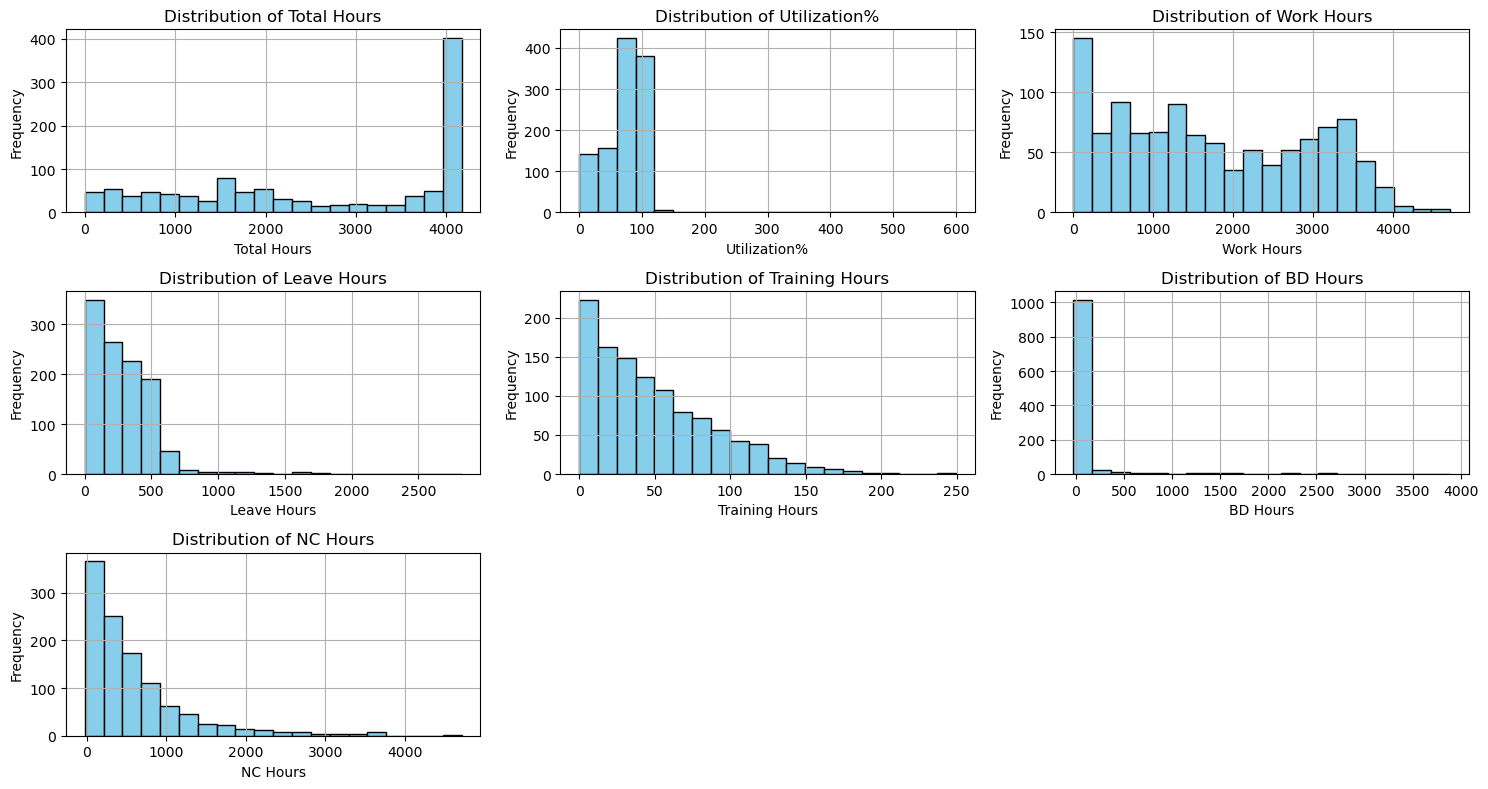

In [98]:
#visulaize data to check distributions of data via histogram
import matplotlib.pyplot as plt

# Select variables for univariate analysis
variables = ['Total Hours', 'Utilization%', 'Work Hours', 'Leave Hours', 'Training Hours', 'BD Hours', 'NC Hours']

# Plot histograms for each variable
plt.figure(figsize=(15, 8))
for i, variable in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    plt.hist(result[variable], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


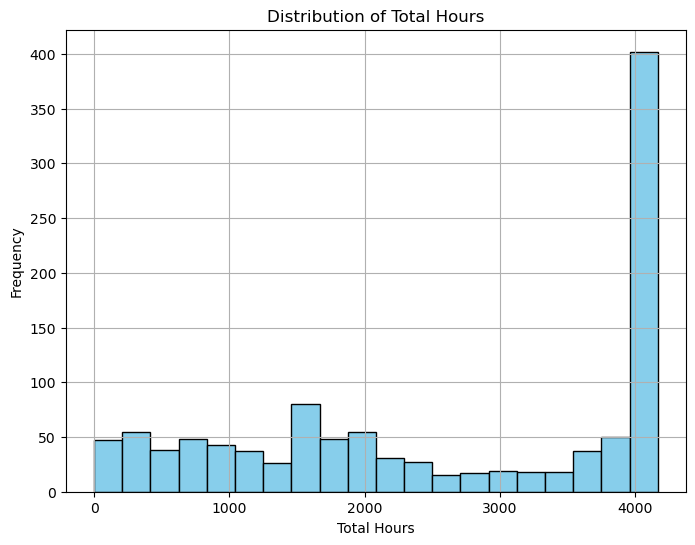

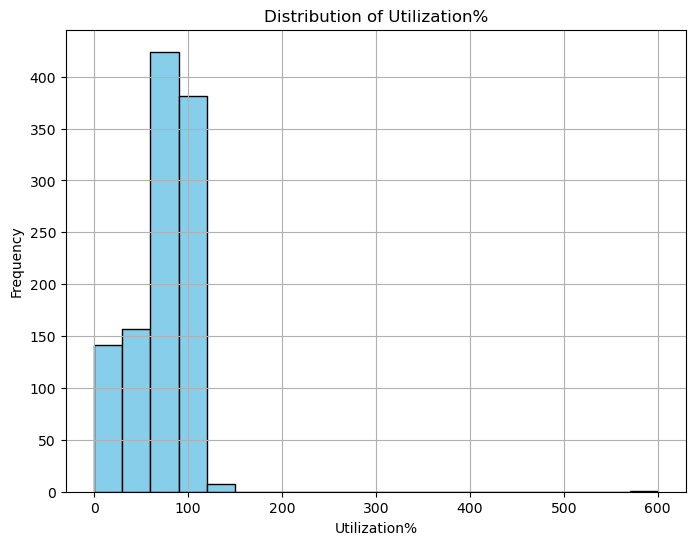

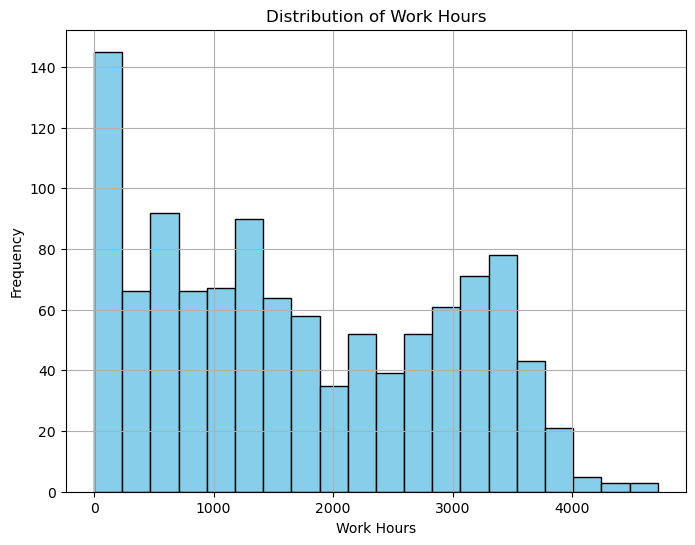

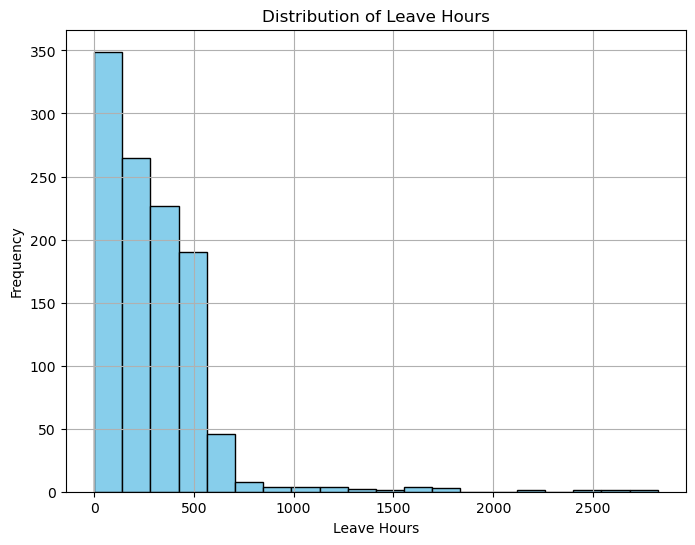

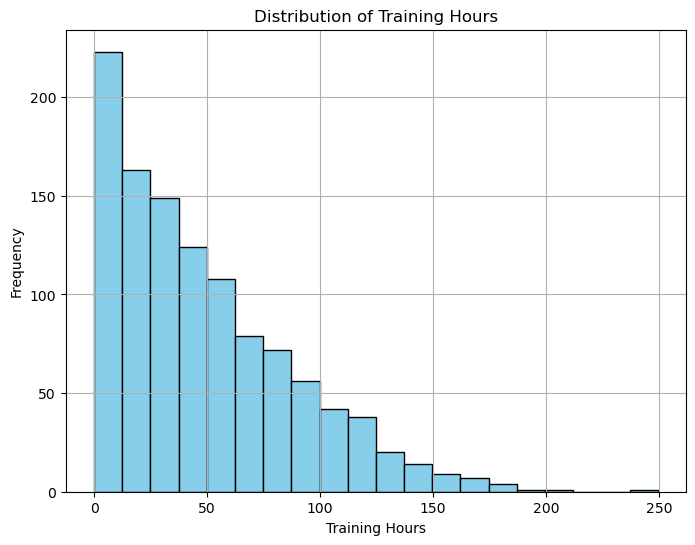

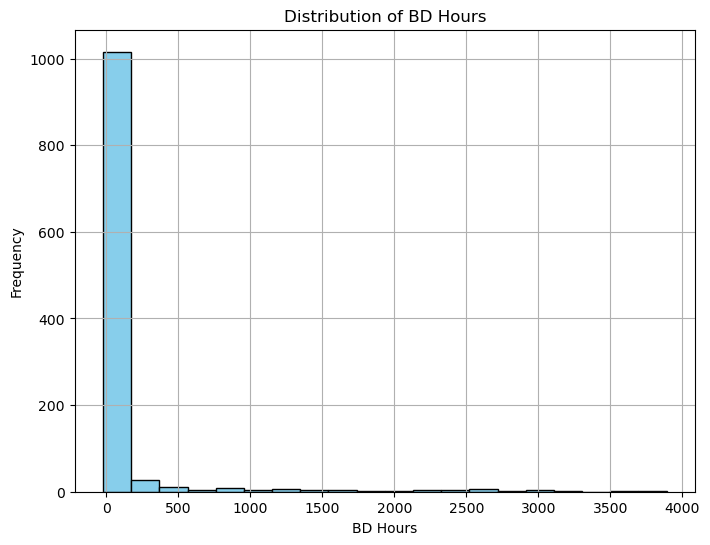

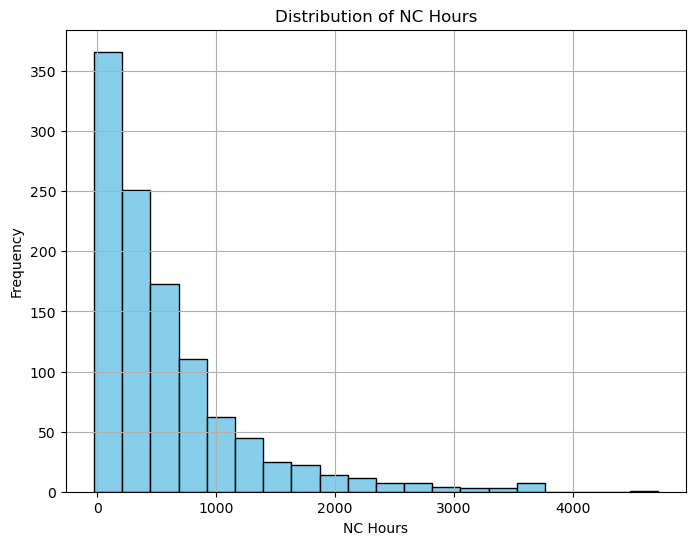

In [99]:
#visulaize data to check distributions of data via histogram
import matplotlib.pyplot as plt

# Select variables for univariate analysis
variables = ['Total Hours', 'Utilization%', 'Work Hours', 'Leave Hours', 'Training Hours', 'BD Hours', 'NC Hours']

# Plot histograms for each variable
for variable in variables:
    plt.figure(figsize=(8, 6))
    plt.hist(result[variable], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


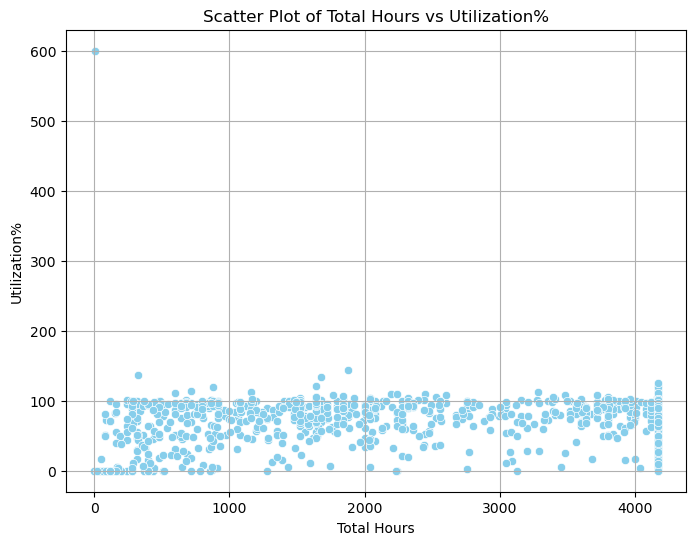

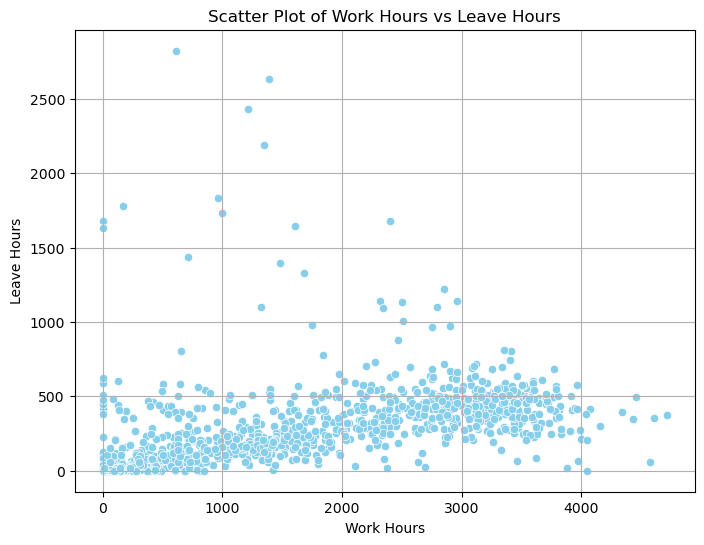

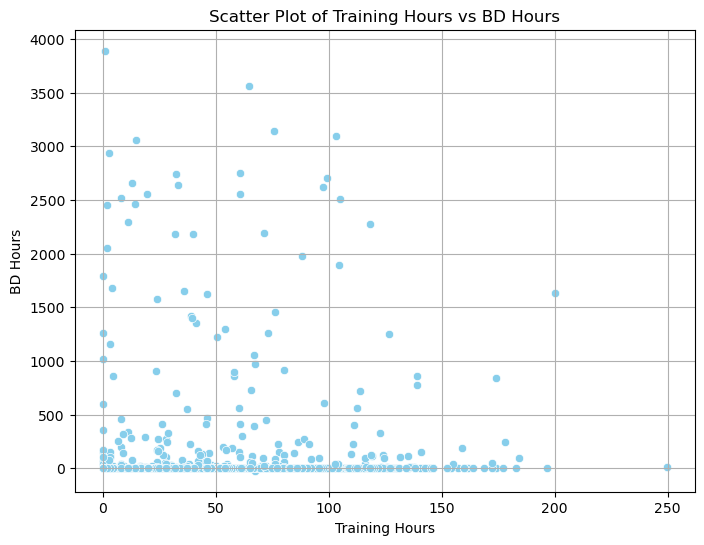

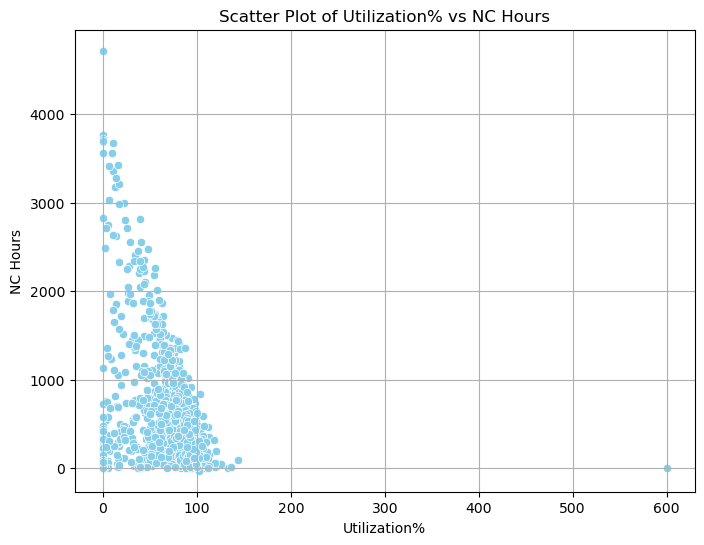

In [100]:
import seaborn as sns

# Select pairs of variables for bivariate analysis
pairs = [('Total Hours', 'Utilization%'), 
         ('Work Hours', 'Leave Hours'), 
         ('Training Hours', 'BD Hours'),
         ('Utilization%', 'NC Hours')]

# Plot scatter plots for each pair of variables
for pair in pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pair[0], y=pair[1], data=result, color='skyblue')
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.grid(True)
    plt.show()


In [101]:
#check corrleation of data 
# Calculate correlation matrix
correlation_matrix = result.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                       Employee No  Termination Date  Total Hours  \
Employee No               1.000000         -0.161623    -0.597078   
Termination Date         -0.161623          1.000000    -0.473029   
Total Hours              -0.597078         -0.473029     1.000000   
Total Available Hours    -0.584842         -0.464571     0.987568   
Work Hours               -0.369676         -0.404148     0.801763   
Leave Hours              -0.458051         -0.295885     0.651070   
Training Hours            0.133817         -0.291222     0.268824   
BD Hours                 -0.254504         -0.082053     0.211952   
NC Hours                 -0.363703         -0.179096     0.450117   
Utilization%              0.035923         -0.118351     0.162905   
Profit Center            -0.197661          0.053772     0.074241   
Employee Position         0.412571          0.058372    -0.250800   
Employee Location         0.023685          0.031463    -0.008808   

             

C:\Users\Tarushee\AppData\Local\Temp\ipykernel_14552\974927929.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = result.corr()


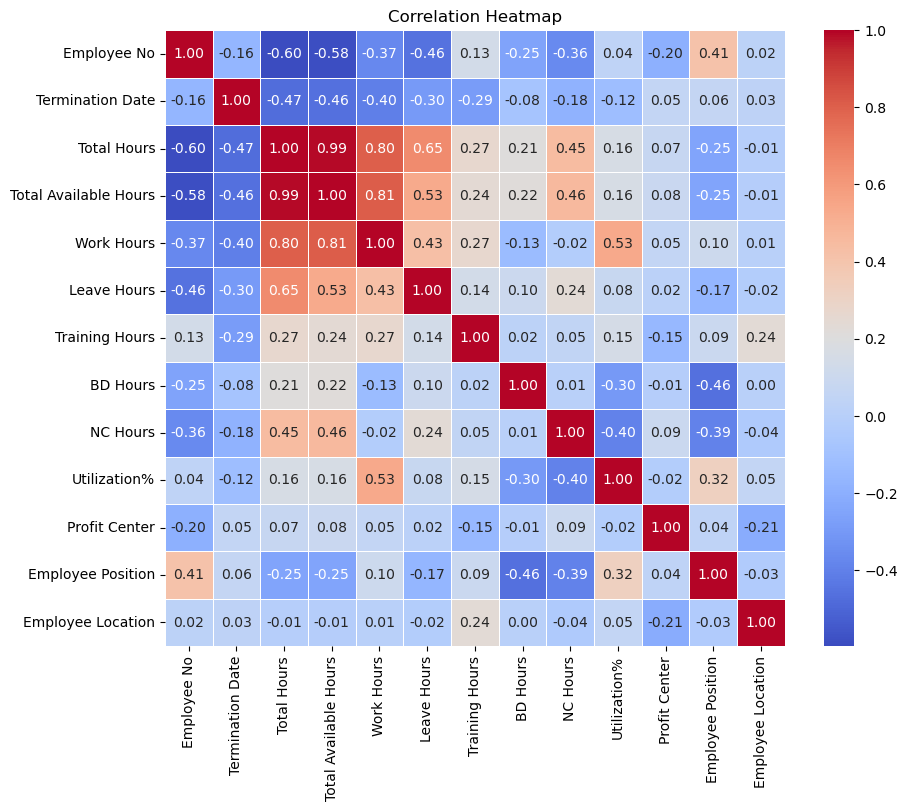

In [102]:
#visulaize correlation to identify high correlation variable and drop them
import seaborn as sns

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


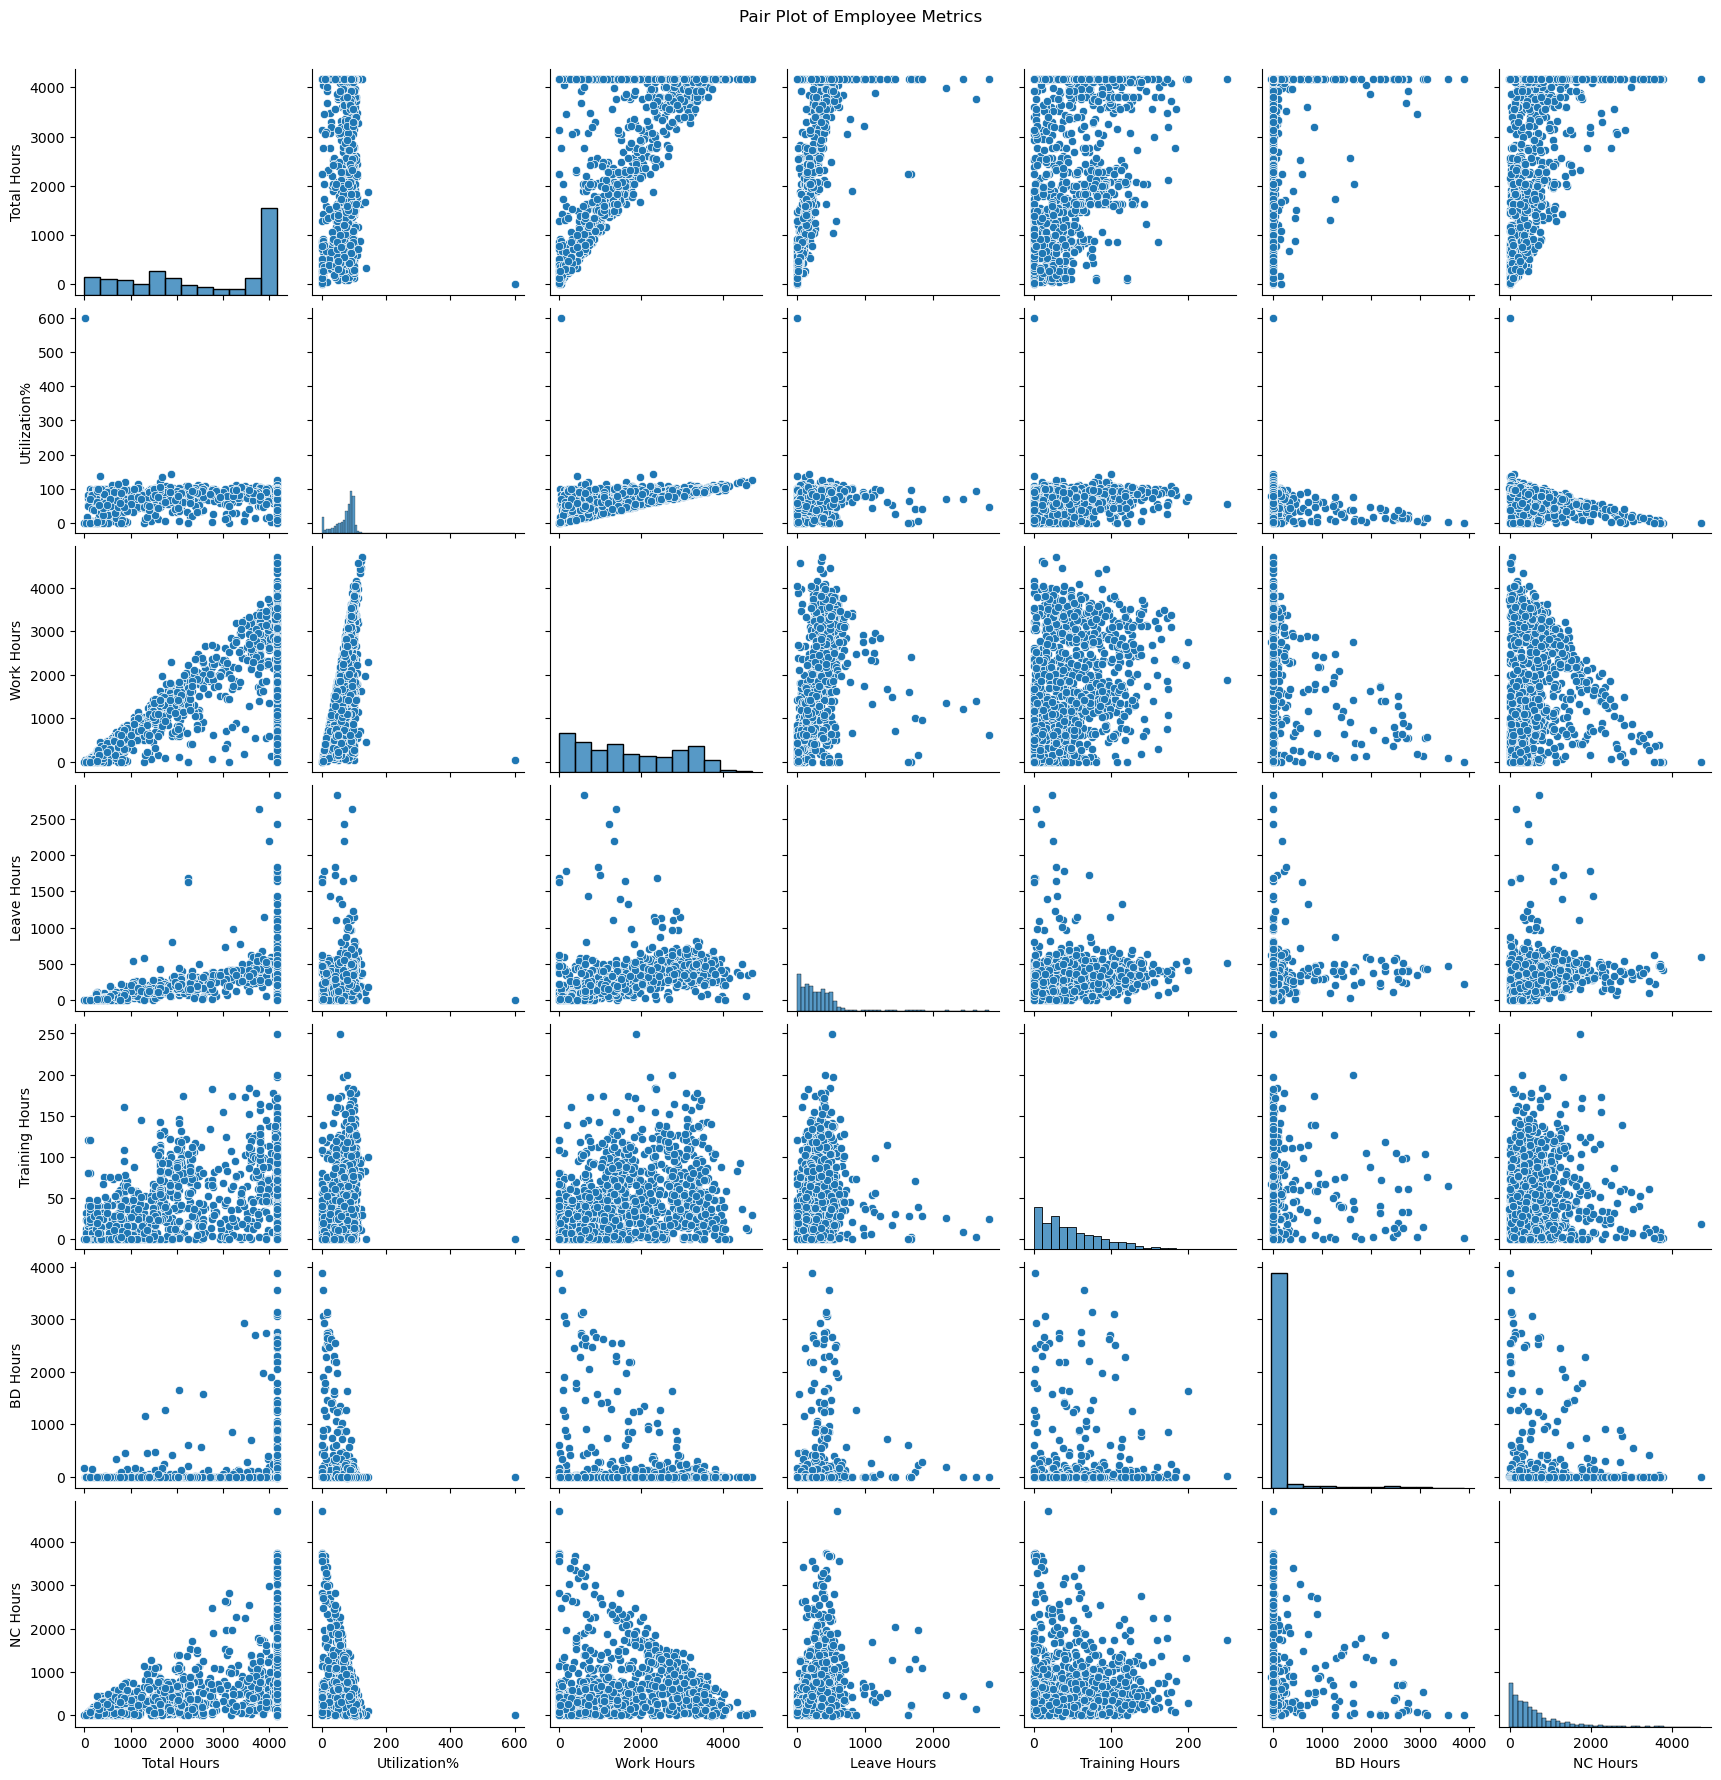

In [103]:
#visualize data via scatter plot 
import seaborn as sns

# Select variables for pair plot
variables = ['Total Hours', 'Utilization%', 'Work Hours', 'Leave Hours', 'Training Hours', 'BD Hours', 'NC Hours']

# Create pair plot
sns.pairplot(result[variables])
plt.suptitle('Pair Plot of Employee Metrics', y=1.02)
plt.show()


In [104]:
#pip install lifelines

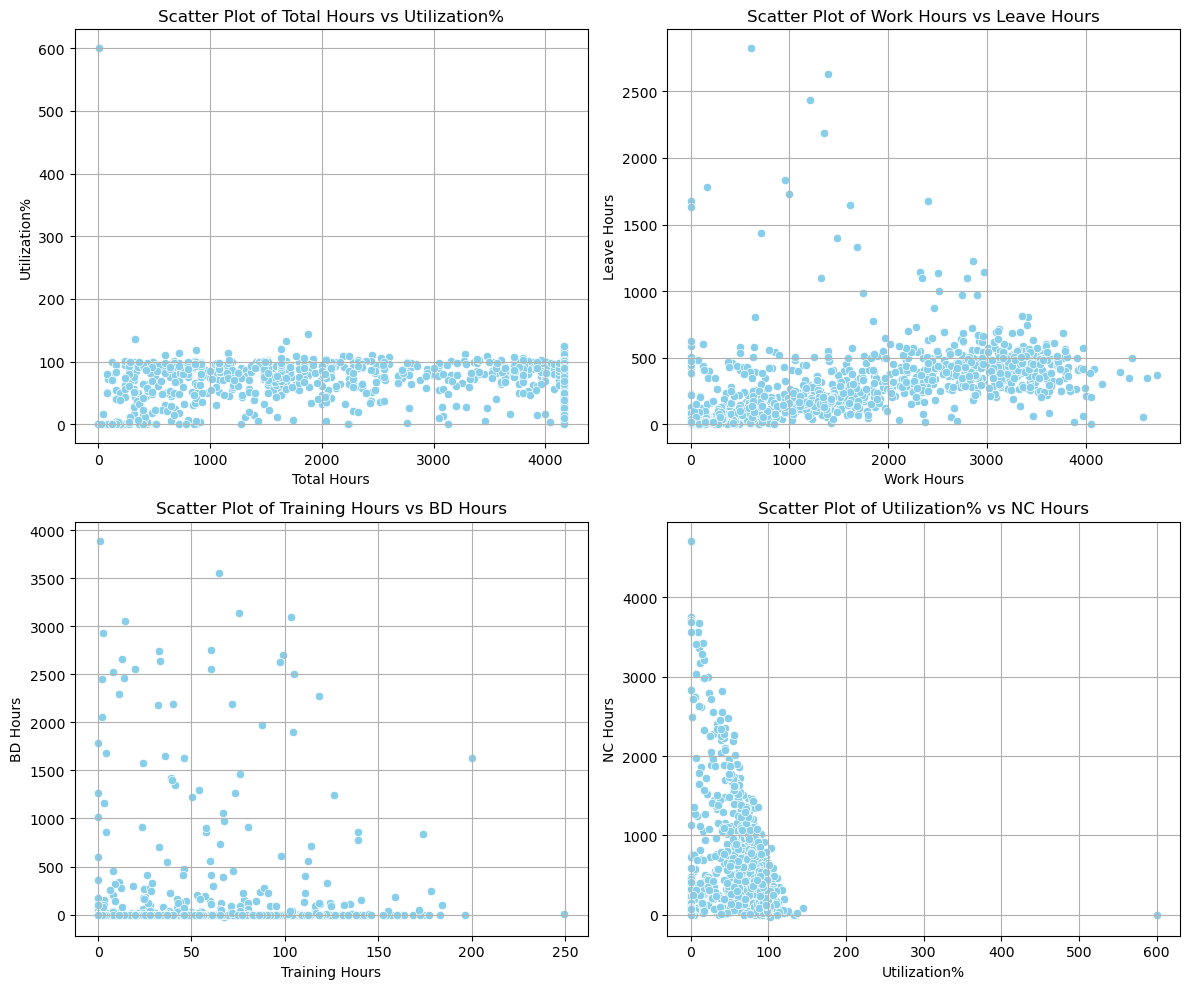

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select pairs of variables for bivariate analysis
pairs = [('Total Hours', 'Utilization%'), 
         ('Work Hours', 'Leave Hours'), 
         ('Training Hours', 'BD Hours'),
         ('Utilization%', 'NC Hours')]

# Create subplots for each pair of variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each pair of variables
for i, pair in enumerate(pairs):
    sns.scatterplot(x=pair[0], y=pair[1], data=result, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    axes[i].set_xlabel(pair[0])
    axes[i].set_ylabel(pair[1])
    axes[i].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


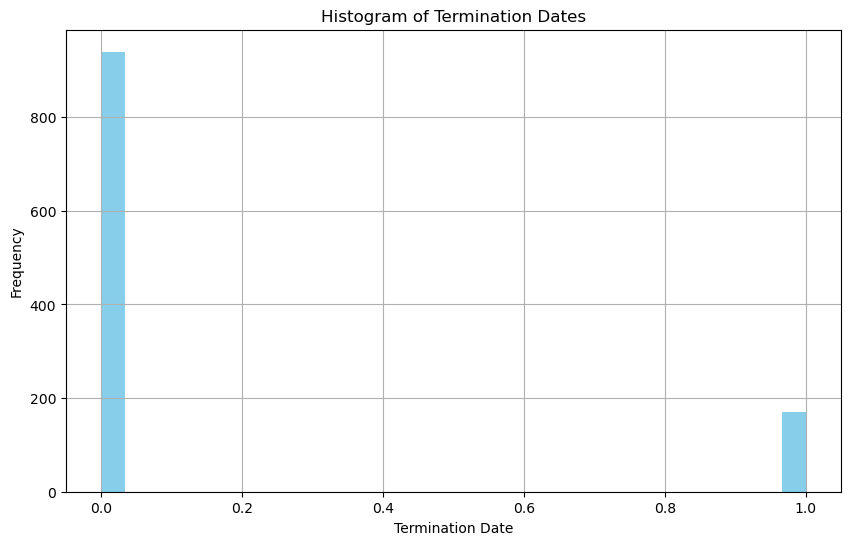

In [106]:
# Plot a histogram of termination dates which is our target variable
plt.figure(figsize=(10, 6))
result['Termination Date'].hist(bins=30, color='skyblue')
plt.title('Histogram of Termination Dates')
plt.xlabel('Termination Date')
plt.ylabel('Frequency')
plt.show()


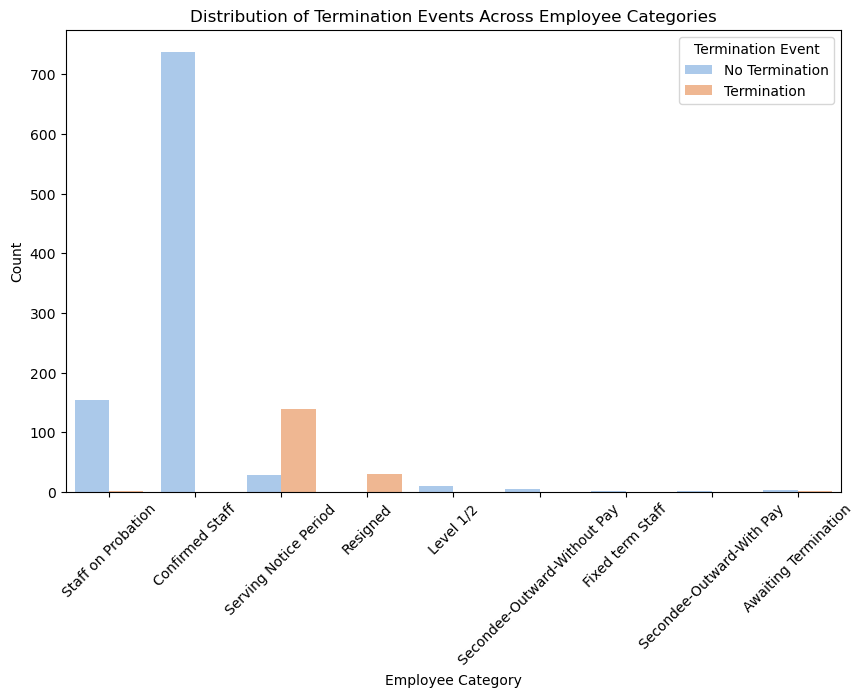

In [107]:
#check our target variable more
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualizing termination events across different employee categories
plt.figure(figsize=(10, 6))
sns.countplot(data=result, x='Employee Category', hue='Termination Date', palette='pastel')
plt.title('Distribution of Termination Events Across Employee Categories')
plt.xlabel('Employee Category')
plt.ylabel('Count')
plt.legend(title='Termination Event', labels=['No Termination', 'Termination'])
plt.xticks(rotation=45)
plt.show()

In [108]:
#check our target Varaible with their supervisor name
relation_df = pd.crosstab(result['Termination Date'], result['Supervisor name'])
# Apply formatting options for better readability
styled_df = relation_df.style.set_properties(**{'text-align': 'center'})

# Display the styled DataFrame
styled_df


Supervisor name,-,Abagail Druci,Aeriela Elonore,Agata Theodosia,Agnes Stacie,Ailyn Marie-Ann,Aimil Latisha,Ali Elsinore,Alvinia Ede,Annnora Gabrielle,Ardys Katerine,Audi Stephana,Barbee Joey,Benedikta Kirbee,Bernice Andrea,Beryle Lisha,Beverley Laney,Blair Dinny,Blondy Tatiania,Cacilia Aimee,Cassandra Katerina,Cherise Lainey,Cherry Fancie,Chris Ricky,Christina Desdemona,Claudia Meaghan,Conni Athene,Cordey Sofia,Cordula Devan,Cortney Wanids,Cosette Lavena,Cristina Maren,Cynthia Leonora,Danette Melinda,Dannie Clotilda,Daryl Natalina,Deloris Gabriella,Dionne Ronna,Donette Verne,Dora Jobi,Dore Natalya,Dorotea Inger,Dottie Bidget,Douglas Herrera,Em Cacilie,Emelda Jackqueline,Erminie Ericka,Eydie Francine,Ezmeralda Nisse,Frances Mignonne,Gavra Kayle,Genvieve Celeste,Gert Editha,Gisella Nickie,Grata Rochella,Guenevere Florida,Hedi Elna,Hedwiga Mehetabel,Idalina Lauraine,Ilsa Marigold,Imelda Madalena,Iormina Lucienne,Irene Candis,Isahella Gwendolin,Jamiya Sellers,Jillana Vivi,Jillian Lorelei,Johan Gaines,Jolyn Briney,Jordanna Danya,Josey Rorie,Josi Ula,Kali Gwendolyn,Kalie Sylvia,Kalindi Toma,Kathye Edna,Kati Rosalyn,Katuscha Pru,Kippy Marquita,Klarrisa Theresita,Kristina Alleen,Kylen Evania,Kynthia Hildy,Laetitia Yoshi,Landon Browning,Lane Ailina,Latosha Bierbaum,Lee Alfie,Lenora Nydia,Leta Evangeline,Lian Harley,Libby Bowen,Lindy Marguerite,Luciana Erika,Margo Opaline,Maria Aubrey,Marina Garnette,Marleah Bernadina,Marne Linn,Marney Anderea,Marys Essy,Mathilda Tomi,Mira Fiorenze,Misti Helena,Moira Vivien,Morgen Hailee,Myrtie Brana,Nancee Deirdre,Nanine Prudy,Naomi Rebekah,Nerissa Jackquelin,Nerita Anet,Nikolia Shirl,Ophelie Jyoti,Orelee Hanna,Oriana Tabby,Orsa Margeaux,Pamelina Shalna,Philippe Kizzie,Prudi Delly,Refugia Morganti,Revkah Stephie,Rina Debee,Rochette Jilleen,Rosabel Saidee,Rosabella Arlina,Rosalynd Catina,Ruthe Bellina,Sheila Papagena,Sile Lorrie,Stacey Cassey,Sybil Georgianna,Talia Bautista,Tallia Eyde,Tallulah Kassia,Tamra Joelle,Tatiana Roxanna,Terza Gwyn,Tiena Hatti,Tommy Muire,Trenna Mureil,Trudey Lissi,Vanessa Zingaro,Vinni Calypso,Vonni Bethena,Willette Lil,Xylina Beatriz,Yolanthe Laurella,Zaneta Arlette,Zaria Dawn
Termination Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,8,4,0,7,11,4,10,4,4,11,6,1,8,13,4,6,16,3,7,4,6,4,1,4,4,2,5,5,9,7,7,5,10,4,2,3,1,6,11,14,13,5,1,6,4,6,10,9,6,10,6,5,9,13,4,8,6,9,6,6,4,5,10,11,1,12,10,3,5,2,4,8,5,3,6,8,1,6,3,8,11,2,3,1,8,8,1,8,2,6,10,5,3,5,4,1,8,8,5,4,7,3,4,11,7,6,5,6,10,12,7,9,8,10,4,7,1,4,7,5,10,7,8,7,8,2,6,5,6,3,13,5,5,10,10,24,5,10,8,5,5,9,7,7,8,5,6
1,5,0,0,1,1,1,3,3,1,2,3,0,1,0,2,0,1,0,0,3,0,3,1,0,0,1,0,2,0,0,0,0,1,1,0,2,0,0,0,0,2,3,1,0,2,0,1,1,0,4,1,0,1,2,0,6,6,3,0,1,1,0,0,1,0,1,1,0,4,0,2,1,0,0,1,0,0,3,2,0,3,0,4,1,1,0,0,1,1,0,2,0,3,1,1,0,1,2,0,1,1,0,0,3,0,0,6,1,0,0,2,1,0,1,2,0,4,4,1,0,0,1,3,0,1,1,0,0,0,2,1,1,0,5,1,0,0,4,0,2,3,0,0,2,3,3,1,0,0,0


In [109]:
print(relation_df)


Supervisor name   -  Abagail Druci  Aeriela Elonore  Agata Theodosia  \
Termination Date                                                       
0                 0              1                1                8   
1                 5              0                0                1   

Supervisor name   Agnes Stacie  Ailyn Marie-Ann  Aimil Latisha  Ali Elsinore  \
Termination Date                                                               
0                            4                0              7            11   
1                            1                1              3             3   

Supervisor name   Alvinia Ede  Annnora Gabrielle  ...  Trenna Mureil  \
Termination Date                                  ...                  
0                           4                 10  ...             10   
1                           1                  2  ...              3   

Supervisor name   Trudey Lissi  Vanessa Zingaro  Vinni Calypso  Vonni Bethena  \
Termination Date    

In [110]:
#validate data
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1110
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee No            1111 non-null   int64  
 1   Employee Category      1111 non-null   object 
 2   Supervisor name        1111 non-null   object 
 3   Current Status         1111 non-null   object 
 4   Termination Date       1111 non-null   int64  
 5   Total Hours            1111 non-null   int64  
 6   Total Available Hours  1111 non-null   float64
 7   Work Hours             1111 non-null   float64
 8   Leave Hours            1111 non-null   float64
 9   Training Hours         1111 non-null   float64
 10  BD Hours               1111 non-null   float64
 11  NC Hours               1111 non-null   float64
 12  Utilization%           1111 non-null   float64
 13  Profit Center          1111 non-null   float64
 14  Employee Position      1111 non-null   float64
 15  Empl

In [114]:
terminated_employees = result[(result['Current Status'] == 'Resigned') | (result['Current Status'] == 'Terminated')]
terminated_employees.T
# Apply formatting options for better readability
styled_terminated_employees = terminated_employees.style.set_properties(**{'text-align': 'center'})

# Display the styled DataFrame
styled_terminated_employees

,Employee No,Employee Category,Supervisor name,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Profit Center,Employee Position,Employee Location
12,144,Serving Notice Period,Tallia Eyde,Resigned,1,872,776.000000,8.000000,24.000000,72.000000,452.000000,340.000000,1.030000,6.000000,5.000000,7.000000
17,11,Serving Notice Period,Cacilia Aimee,Resigned,1,1616,1528.000000,720.000000,88.000000,0.000000,0.000000,888.000000,47.120000,3.000000,4.000000,1.000000
28,880,Resigned,-,Resigned,1,1064,952.000000,727.000000,64.000000,48.000000,32.000000,369.500000,76.370000,2.000000,8.000000,7.000000
34,518,Serving Notice Period,Myrtie Brana,Resigned,1,2360,2075.000000,1881.000000,208.000000,77.000000,0.000000,335.000000,90.650000,2.000000,8.000000,7.000000
38,316,Serving Notice Period,Willette Lil,Resigned,1,1408,1304.000000,1304.000000,104.000000,0.000000,0.000000,64.000000,100.000000,5.000000,7.000000,1.000000
50,116,Serving Notice Period,Trenna Mureil,Resigned,1,2072,1764.000000,1527.000000,232.000000,76.000000,40.000000,240.000000,86.560000,2.000000,6.000000,7.000000
62,54,Serving Notice Period,Philippe Kizzie,Resigned,1,1520,1362.000000,865.000000,112.000000,46.000000,472.000000,84.000000,63.510000,2.000000,5.000000,7.000000
66,174,Serving Notice Period,Frances Mignonne,Resigned,1,808,752.000000,568.000000,48.000000,8.000000,36.000000,176.000000,75.530000,6.000000,8.000000,7.000000
78,575,Serving Notice Period,Frances Mignonne,Resigned,1,1912,1721.000000,1693.000000,140.000000,51.000000,0.000000,126.000000,98.370000,6.000000,8.000000,7.000000
82,597,Serving Notice Period,Hedi Elna,Resigned,1,1880,1798.000000,1380.000000,56.000000,26.000000,0.000000,703.000000,76.750000,3.000000,8.000000,1.000000


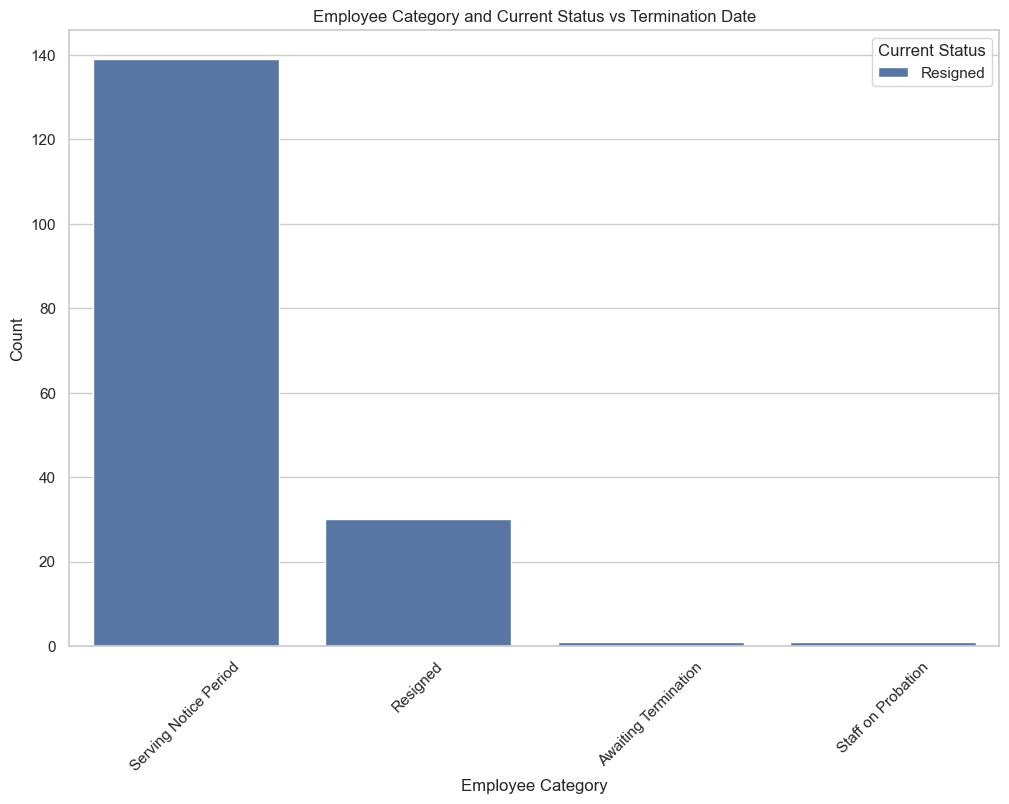

In [117]:
# Stacked bar plot of Employee Category and Current Status vs Termination Date
plt.figure(figsize=(12, 8))
sns.countplot(data=terminated_employees, x='Employee Category', hue='Current Status')
plt.title('Employee Category and Current Status vs Termination Date')
plt.xlabel('Employee Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Current Status')
plt.show()


In [ ]:
#!python -m pip install prophet


In [118]:
result.shape

(1111, 16)

In [119]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1110
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee No            1111 non-null   int64  
 1   Employee Category      1111 non-null   object 
 2   Supervisor name        1111 non-null   object 
 3   Current Status         1111 non-null   object 
 4   Termination Date       1111 non-null   int64  
 5   Total Hours            1111 non-null   int64  
 6   Total Available Hours  1111 non-null   float64
 7   Work Hours             1111 non-null   float64
 8   Leave Hours            1111 non-null   float64
 9   Training Hours         1111 non-null   float64
 10  BD Hours               1111 non-null   float64
 11  NC Hours               1111 non-null   float64
 12  Utilization%           1111 non-null   float64
 13  Profit Center          1111 non-null   float64
 14  Employee Position      1111 non-null   float64
 15  Empl

In [120]:
result.isnull().sum()

Employee No              0
Employee Category        0
Supervisor name          0
Current Status           0
Termination Date         0
Total Hours              0
Total Available Hours    0
Work Hours               0
Leave Hours              0
Training Hours           0
BD Hours                 0
NC Hours                 0
Utilization%             0
Profit Center            0
Employee Position        0
Employee Location        0
dtype: int64

In [121]:
# Shapiro Hypothesis Testing
# Null- Data is normal
# Alternatve  - Data is not normal
# 95% - Alpha - 0.05
from scipy import stats
stats.shapiro(result["Termination Date"])

ShapiroResult(statistic=0.4318922162055969, pvalue=0.0)

In [ ]:
#checking numerical columns only
numerical_columns = result .select_dtypes(include='number').columns
numerical_columns


In [ ]:
# Shapiro Hypothesis Testing
# Null- Data is normal
# Alternatve  - Data is not normal
# 95% - Alpha - 0.05
from scipy import stats
stats.shapiro(result["Termination Date"])

The result ShapiroResult(statistic=0.4318922162055969, pvalue=0.0) from the Shapiro-Wilk test indicates that the data is not normally distributed. Here’s how to interpret this result:

Statistic: The Shapiro-Wilk test statistic. In this case, it is approximately 0.4319. A value close to 1 indicates that the data is closer to a normal distribution.
p-value: The significance level of the test. In this case, it is 0.0 (or very close to 0).

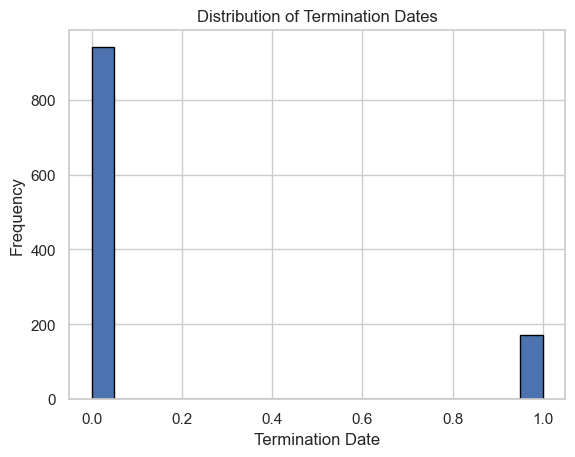

In [123]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(result['Termination Date'], bins=20, edgecolor='black')
plt.title('Distribution of Termination Dates')
plt.xlabel('Termination Date')
plt.ylabel('Frequency')
plt.show()


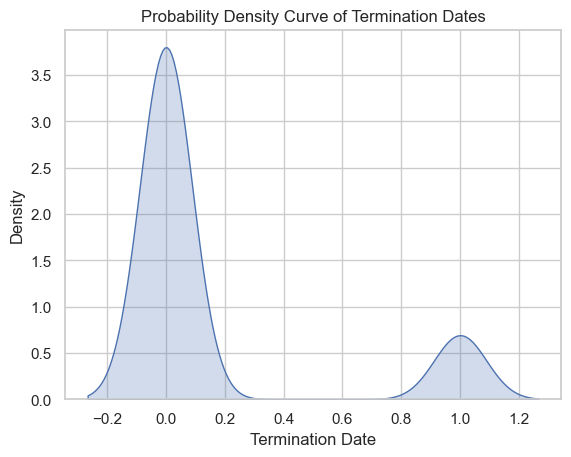

In [124]:
import seaborn as sns

# Plot probability density curve
sns.kdeplot(result['Termination Date'], fill=True)
plt.title('Probability Density Curve of Termination Dates')
plt.xlabel('Termination Date')
plt.ylabel('Density')
plt.show()


In [125]:
result.info()
#validate Data


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1110
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee No            1111 non-null   int64  
 1   Employee Category      1111 non-null   object 
 2   Supervisor name        1111 non-null   object 
 3   Current Status         1111 non-null   object 
 4   Termination Date       1111 non-null   int64  
 5   Total Hours            1111 non-null   int64  
 6   Total Available Hours  1111 non-null   float64
 7   Work Hours             1111 non-null   float64
 8   Leave Hours            1111 non-null   float64
 9   Training Hours         1111 non-null   float64
 10  BD Hours               1111 non-null   float64
 11  NC Hours               1111 non-null   float64
 12  Utilization%           1111 non-null   float64
 13  Profit Center          1111 non-null   float64
 14  Employee Position      1111 non-null   float64
 15  Empl

In [126]:
# Filter out only numerical columns
numerical_columns = ['Employee No', 'Total Hours', 'Training Hours', 'BD Hours', 'NC Hours', 'Utilization%', 'Profit Center', 'Employee Position', 'Employee Location']
#not taking total avaiable hours as it is highly corelated with Total Hours
# Define feature matrix X with only numerical columns
X = result[numerical_columns]
y = result['Termination Date']


In [127]:
numerical_columns

['Employee No',
 'Total Hours',
 'Training Hours',
 'BD Hours',
 'NC Hours',
 'Utilization%',
 'Profit Center',
 'Employee Position',
 'Employee Location']

In [128]:
import pandas as pd

# Assuming X is your NumPy array
X_df = pd.DataFrame(X)

# Now you can access the columns of the DataFrame
print("Columns present in X_df:", X_df.columns)


Columns present in X_df: Index(['Employee No', 'Total Hours', 'Training Hours', 'BD Hours', 'NC Hours',
       'Utilization%', 'Profit Center', 'Employee Position',
       'Employee Location'],
      dtype='object')


In [129]:
print("Column names:", X_df.columns)


Column names: Index(['Employee No', 'Total Hours', 'Training Hours', 'BD Hours', 'NC Hours',
       'Utilization%', 'Profit Center', 'Employee Position',
       'Employee Location'],
      dtype='object')


In [130]:
#checking our target variable 
y


0       0
1       0
2       0
3       0
4       0
       ..
1106    0
1107    1
1108    0
1109    0
1110    0
Name: Termination Date, Length: 1111, dtype: int64

In [131]:
#checking outliers in the numerical columns 
result[numerical_columns].describe(percentiles=[0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99]).T


,count,mean,std,min,1%,2%,3%,4%,5%,10%,50%,90%,95%,96%,97%,98%,99%,max
Employee No,1111.0,556.000000,320.862380,1.0,12.1,23.2,34.3,45.4,56.500,112.00,556.00,1000.0,1055.500,1066.600,1077.700,1088.80,1099.900,1111.0
Total Hours,1111.0,2617.209721,1473.400484,0.0,80.0,107.2,152.0,200.0,272.000,480.00,2760.00,4168.0,4168.000,4168.000,4168.000,4168.00,4168.000,4168.0
Training Hours,1111.0,48.405770,40.618409,0.0,0.0,0.0,0.0,0.0,0.000,1.30,39.00,108.0,125.780,130.600,138.700,151.20,171.650,249.5
BD Hours,1111.0,110.225923,444.375525,-24.0,0.0,0.0,0.0,0.0,0.000,0.00,0.00,120.0,657.500,948.100,1414.700,2157.40,2616.650,3891.0
NC Hours,1111.0,577.371719,650.453143,-28.5,0.0,0.0,0.0,8.0,16.000,32.00,375.50,1363.0,1877.875,2068.536,2334.650,2699.40,3274.350,4715.5
Utilization%,1111.0,72.360963,34.005180,0.0,0.0,0.0,0.0,0.0,0.515,18.18,81.75,100.0,102.670,103.758,106.576,108.78,113.282,600.0
Profit Center,1111.0,2.761476,1.521554,1.0,1.0,1.0,1.0,1.0,1.000,1.00,3.00,5.0,6.000,6.000,6.000,6.00,6.000,10.0
Employee Position,1111.0,6.688569,1.464365,0.0,1.1,2.0,3.0,3.0,4.000,5.00,7.00,8.0,8.000,8.000,8.000,8.00,8.000,10.0
Employee Location,1111.0,3.870387,2.709565,1.0,1.0,1.0,1.0,1.0,1.000,1.00,3.00,7.0,9.000,9.000,9.000,9.00,9.000,9.0


In [132]:
#treat outliers
from scipy.stats.mstats import winsorize

# Specify the percentage of values to winsorize from both ends (e.g., 0.05 for 5%)
winsorization_percentage = 0.05

# Apply winsorization to each numerical column
for column in numerical_columns:
    result[column] = winsorize(result[column], limits=winsorization_percentage)

# Now, outliers in each numerical column have been winsorized


In [133]:
# Calculate summary statistics before winsorization
summary_before = data[numerical_columns].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T

# Apply winsorization to each numerical column
for column in numerical_columns:
    data[column] = winsorize(data[column], limits=winsorization_percentage)

# Calculate summary statistics after winsorization
summary_after = data[numerical_columns].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T

# Compare summary statistics before and after winsorization
summary_comparison = pd.concat([summary_before, summary_after], axis=1, keys=['Before Winsorization', 'After Winsorization'])

print(summary_comparison)


               Before Winsorization                                      \
                              count         mean          std       min   
Employee No                  2084.0   571.591171   321.622796   1.00000   
Total Hours                  2084.0  2157.785029  1262.720908   0.00000   
Training Hours               2084.0    39.173100    37.004855   0.00000   
BD Hours                     2084.0    88.245681   369.537816 -24.00000   
NC Hours                     2084.0   464.486723   558.853223 -28.50000   
Utilization%                 2084.0    38.918883    43.518473  -0.04918   

                                                                           \
                   1%      5%          25%       50%        75%       95%   
Employee No     12.83   57.15   295.750000   582.500   851.0000  1059.000   
Total Hours     80.00  244.80  1320.000000  2080.000  3160.0000  4168.000   
Training Hours   0.00    0.00    11.500000    28.000    57.0000   114.000   
BD Hours      

In [134]:
print("X:", X.shape)
print("y:", y.shape)


X: (1111, 9)
y: (1111,)


In [135]:
X_df.shape

(1111, 9)

In [136]:
print("Min:", X.min())
print("Max:", X.max())
print("Mean:", X.mean())
print("Standard Deviation:", X.std())


Min: Employee No           1.0
Total Hours           0.0
Training Hours        0.0
BD Hours            -24.0
NC Hours            -28.5
Utilization%          0.0
Profit Center         1.0
Employee Position     0.0
Employee Location     1.0
dtype: float64
Max: Employee No          1111.0
Total Hours          4168.0
Training Hours        249.5
BD Hours             3891.0
NC Hours             4715.5
Utilization%          600.0
Profit Center          10.0
Employee Position      10.0
Employee Location       9.0
dtype: float64
Mean: Employee No           556.000000
Total Hours          2617.209721
Training Hours         48.405770
BD Hours              110.225923
NC Hours              577.371719
Utilization%           72.360963
Profit Center           2.761476
Employee Position       6.688569
Employee Location       3.870387
dtype: float64
Standard Deviation: Employee No           320.862380
Total Hours          1473.400484
Training Hours         40.618409
BD Hours              444.375525
NC H

In [137]:
import pandas as pd

# Assuming X is your DataFrame
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1110
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee No        1111 non-null   int64  
 1   Total Hours        1111 non-null   int64  
 2   Training Hours     1111 non-null   float64
 3   BD Hours           1111 non-null   float64
 4   NC Hours           1111 non-null   float64
 5   Utilization%       1111 non-null   float64
 6   Profit Center      1111 non-null   float64
 7   Employee Position  1111 non-null   float64
 8   Employee Location  1111 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 86.8 KB


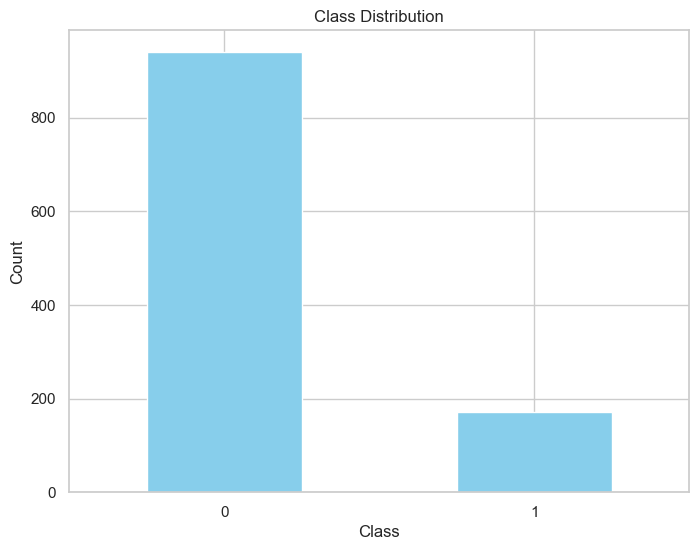

Data is unbalanced


In [138]:
import pandas as pd
import matplotlib.pyplot as plt


# Assuming 'target' is your target variable
class_distribution = result ['Termination Date'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Check if data is balanced or unbalanced
if len(class_distribution) == 2:
    ratio = class_distribution[0] / class_distribution[1]
    if ratio > 0.8 and ratio < 1.2:
        print("Data is balanced")
    else:
        print("Data is unbalanced")
else:
    print("Multi-class classification problem. Check class distribution.")

In [139]:

# Assuming 'target' is your target variable
class_distribution = result['Termination Date'].value_counts()

# Calculate the class imbalance ratio
if len(class_distribution) == 2:
    imbalance_ratio = class_distribution[0] / class_distribution[1]
    print("Class imbalance ratio:", imbalance_ratio)
else:
    print("Multi-class classification problem. Check class distribution.")

Class imbalance ratio: 5.497076023391813


In [140]:

# Assuming 'target' is your target variable
class_distribution = result['Termination Date'].value_counts(normalize=True)

print("Class Distribution:")
print(class_distribution)

Class Distribution:
0    0.846085
1    0.153915
Name: Termination Date, dtype: float64


In [141]:
print("X:", X.shape)
print(" y:", y.shape)


X: (1111, 9)
 y: (1111,)


In [142]:
#pip install --user scikit-learn imbalanced-learn


In [143]:
#pip install scikit-learn imbalanced-learn


In [144]:
#pip install --upgrade scikit-learn imbalanced-learn


In [145]:
X.columns

Index(['Employee No', 'Total Hours', 'Training Hours', 'BD Hours', 'NC Hours',
       'Utilization%', 'Profit Center', 'Employee Position',
       'Employee Location'],
      dtype='object')

In [146]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1110
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee No        1111 non-null   int64  
 1   Total Hours        1111 non-null   int64  
 2   Training Hours     1111 non-null   float64
 3   BD Hours           1111 non-null   float64
 4   NC Hours           1111 non-null   float64
 5   Utilization%       1111 non-null   float64
 6   Profit Center      1111 non-null   float64
 7   Employee Position  1111 non-null   float64
 8   Employee Location  1111 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 86.8 KB


In [147]:
# Filter out only numerical columns
numerical_columns = ['Employee No', 'Total Hours', 'Training Hours', 'BD Hours', 'NC Hours', 'Utilization%', 'Profit Center', 'Employee Position', 'Employee Location']

# Define feature matrix X with only numerical columns
X = result[numerical_columns]
y = result['Termination Date']

In [148]:
#pip install xgboost


In [149]:
print("X:", X.shape)
print(" y:", y.shape)

X: (1111, 9)
 y: (1111,)


In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Assuming 'result' is your DataFrame and 'Termination_Date' is your target variable

# Separate features (X) and target variable (y)
X = result[numerical_columns]
y = result['Termination Date']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Define Logistic Regression classifier
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best estimator
best_clf = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_clf.predict(X_test)
y_test_prob = best_clf.predict_proba(X_test)[:, 1]

# Make predictions on the training set
y_train_pred = best_clf.predict(X_train_resampled)
y_train_prob = best_clf.predict_proba(X_train_resampled)[:, 1]

# Evaluate the classifier on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Evaluate the classifier on the training set
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_conf_matrix = confusion_matrix(y_train_resampled, y_train_pred)
train_class_report = classification_report(y_train_resampled, y_train_pred)
train_roc_auc = roc_auc_score(y_train_resampled, y_train_prob)

print("Training Set Evaluation")
print(f"Accuracy: {train_accuracy}")
print("Confusion Matrix:")
print(train_conf_matrix)
print("Classification Report:")
print(train_class_report)
print(f"ROC AUC: {train_roc_auc}\n")

print("Testing Set Evaluation")
print(f"Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(test_conf_matrix)
print("Classification Report:")
print(test_class_report)
print(f"ROC AUC: {test_roc_auc}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training Set Evaluation
Accuracy: 0.9263721552878179
Confusion Matrix:
[[684  63]
 [ 47 700]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       747
           1       0.92      0.94      0.93       747

    accuracy                           0.93      1494
   macro avg       0.93      0.93      0.93      1494
weighted avg       0.93      0.93      0.93      1494

ROC AUC: 0.9824357671650457

Testing Set Evaluation
Accuracy: 0.8968609865470852
Confusion Matrix:
[[176  17]
 [  6  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       193
           1       0.59      0.80      0.68        30

    accuracy                           0.90       223
   macro avg       0.78      0.86      0.81       223
weighted avg       0.92      0.90      0.90       223

ROC AUC: 0.943868739205

Considering the accuracy, ROC AUC, and confusion matrices, the Logistic Regression model with L2 regularization appears to be the best choice overall for your dataset. It provides a good balance between model performance, interpretability, and generalization ability.

### This algorithm is Logistic Regression with hyperparameter tuning using GridSearchCV.


This code implements logistic regression with hyperparameter tuning using grid search cross-validation. Here's a breakdown of what it does:

Data Preparation: It imports necessary libraries, loads the data, separates features (X) and the target variable (y), and splits the data into training and testing sets.

Handling Class Imbalance: It applies Synthetic Minority Over-sampling Technique (SMOTE) to balance the training data.

Feature Scaling: It standardizes the features to have a mean of 0 and a standard deviation of 1.

Model Definition: It defines a logistic regression classifier with specific parameters (solver, max_iter).

Hyperparameter Tuning: It sets up a grid search cross-validation to find the best hyperparameters (C and penalty) for the logistic regression model.

Model Evaluation: It evaluates the best classifier on both the training and testing sets using various metrics such as accuracy, confusion matrix, classification report, and ROC AUC score.

This approach helps to find the best hyperparameters for the logistic regression model and assess its performance on unseen data through cross-validation.

In [151]:
#validate Data 
print("X:", X.shape)
print("y:", y.shape)


X: (1111, 9)
y: (1111,)


In [152]:
print("Number of features in X_train:", X_train.shape[1])
print("Number of features in X_test:", X_test.shape[1])


Number of features in X_train: 9
Number of features in X_test: 9


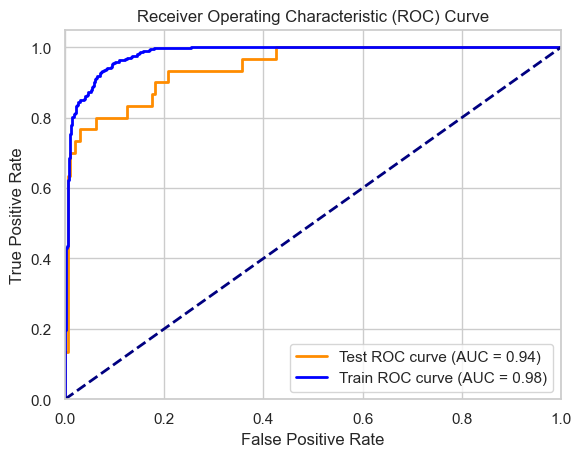

In [153]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_test_prob = best_clf.predict_proba(X_test)[:, 1]
y_train_prob = best_clf.predict_proba(X_train_resampled)[:, 1]

# Compute ROC curve and AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Compute ROC curve and AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Analysis
Accuracy:

The accuracy on the training set is 92.64%, indicating that the model is performing well on the data it was trained on.
The accuracy on the testing set is slightly lower at 89.69%, which is still quite high. This suggests that the model generalizes well to unseen data.
Confusion Matrix:

In the training set, the model correctly classifies a large majority of both classes (0 and 1), with only 63 false positives and 47 false negatives out of 1494 samples.
In the testing set, there are 17 false positives and 6 false negatives out of 223 samples, indicating good performance but with some room for improvement, especially in identifying the minority class (1).
Classification Report:

Precision and Recall:
The model has high precision and recall for class 0 in both training and testing sets.
For class 1, the precision is lower in the testing set (0.59) compared to the training set (0.92). This indicates some difficulty in correctly identifying positive cases in the testing set.
Recall for class 1 is higher (0.80) in the testing set, suggesting the model is better at identifying true positives but at the cost of more false positives.
F1-Score:
The F1-score for class 0 is consistently high, indicating a good balance between precision and recall.
The F1-score for class 1 is lower in the testing set (0.68) than in the training set (0.93), indicating that the model struggles more with the minority class in unseen data.
ROC AUC:

The ROC AUC scores are very high for both training (0.9824) and testing sets (0.9439), indicating that the model has a strong ability to discriminate between the classes.
Conclusion
Your model is performing well overall, with high accuracy and strong ROC AUC scores indicating good discrimination capability. However, there are some points to consider:

The model shows some overfitting, as indicated by the slightly higher performance metrics on the training set compared to the testing set.
The model struggles somewhat with the minority class (1) in the testing set, as shown by the lower precision and F1-score for this class.
Recommendations
Further Tuning:

Consider additional hyperparameter tuning or trying different algorithms to improve minority class prediction.
Handling Class Imbalance:

Explore other techniques for handling class imbalance, such as ensemble methods, adjusting class weights, or further tuning the SMOTE parameters.
Cross-Validation:

Perform cross-validation to ensure that the model’s performance is consistent across different subsets of the data.
Feature Engineering:

Investigate feature engineering techniques that may help improve model performance.
By addressing these areas, you can work towards improving the model's ability to generalize to new data and better handle the minority class.

In [154]:
result.head()

,Employee No,Employee Category,Supervisor name,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Profit Center,Employee Position,Employee Location
0,1056,Staff on Probation,Kali Gwendolyn,New Joiner,0,272,32.0,32.0,8.0,80.0,0.0,16.0,100.00,3.0,7.0,1.0
1,490,Confirmed Staff,Orsa Margeaux,Active,0,4168,3616.0,2326.0,552.0,0.0,0.0,1532.0,64.33,5.0,6.0,1.0
2,655,Confirmed Staff,Iormina Lucienne,Active,0,3760,3479.0,1728.5,248.0,33.0,0.0,1776.0,49.68,3.0,7.0,1.0
3,1056,Staff on Probation,Ruthe Bellina,New Joiner,0,272,131.0,72.0,8.0,21.0,0.0,59.0,54.96,2.0,7.0,9.0
4,610,Confirmed Staff,Ilsa Marigold,Active,0,3960,3575.5,2714.0,312.0,72.5,0.0,890.5,75.91,1.0,7.0,3.0
